In [122]:
# import all necessary libraries
!pip install mysql-connector-python
!pip install vaderSentiment
!pip install tensorflow
!pip install keras
!pip install protobuf
!pip install grpcio
!pip install h5py
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow
import keras
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import time
import json
import re
import math
import pickle
from datetime import datetime
from datetime import timedelta
import requests
from requests.auth import AuthBase
import config
import tools
import mysql.connector
import urllib.parse
from mysql.connector import errorcode
import sqlite3
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [123]:
# reload from pickle checkpoint
with open('pickle-folder/tsla_week1_data.pkl', 'rb') as f:
    train_data = pickle.load(f)
train_data.head(1000)

,avg_price,compound_sentiment,tweet_count,trade_volume
0,,,,
2020-05-11 05:01:00,819.42000,0.510600,1.0,0.0
2020-05-11 05:02:00,819.42000,0.421500,1.0,0.0
2020-05-11 05:03:00,819.42000,0.421500,0.0,0.0
2020-05-11 05:04:00,819.42000,0.843600,1.0,0.0
2020-05-11 05:05:00,819.42000,-0.125000,2.0,0.0
2020-05-11 05:06:00,819.42000,-0.458800,1.0,0.0
2020-05-11 05:07:00,819.42000,-0.699700,1.0,0.0
2020-05-11 05:08:00,819.42000,0.000000,1.0,0.0
2020-05-11 05:09:00,819.42000,-0.661500,1.0,0.0


In [124]:
# reload from pickle checkpoint
with open('pickle-folder/tsla_week2_data.pkl', 'rb') as f:
    test_data = pickle.load(f)
test_data.head(1000)

,avg_price,compound_sentiment,tweet_count,trade_volume
0,,,,
2020-05-20 05:01:00,808.01000,0.000000,2.0,0.0
2020-05-20 05:02:00,808.01000,0.146800,3.0,0.0
2020-05-20 05:03:00,808.01000,0.000000,1.0,0.0
2020-05-20 05:04:00,808.01000,0.101150,2.0,0.0
2020-05-20 05:05:00,808.01000,0.724500,1.0,0.0
2020-05-20 05:06:00,808.01000,0.724500,0.0,0.0
2020-05-20 05:07:00,808.01000,0.724500,0.0,0.0
2020-05-20 05:08:00,808.01000,0.000000,1.0,0.0
2020-05-20 05:09:00,808.01000,0.000000,0.0,0.0


# LSTM - 25 - short - tanh
- 25-dimensionial single layer
- activation = tanh
- epochs = 20
- batch size = 63
- 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 5s - loss: 0.0288 - val_loss: 0.0042
Epoch 2/20
56/56 - 4s - loss: 0.0075 - val_loss: 0.0035
Epoch 3/20
56/56 - 5s - loss: 0.0053 - val_loss: 0.0027
Epoch 4/20
56/56 - 5s - loss: 0.0034 - val_loss: 0.0022
Epoch 5/20
56/56 - 4s - loss: 0.0021 - val_loss: 0.0019
Epoch 6/20
56/56 - 4s - loss: 0.0013 - val_loss: 0.0015
Epoch 7/20
56/56 - 5s - loss: 9.4765e-04 - val_loss: 8.7246e-04
Epoch 8/20
56/56 - 4s - loss: 8.1968e-04 - val_loss: 5.0738e-04
Epoch 9/20
56/56 - 4s - loss: 7.6150e-04 - val_loss: 3.4160e-04
Epoch 10/20
56/56 - 4s - loss: 7.3664e-04 - val_loss: 2.8248e-04
Epoch 11/20
56/56 - 4s - loss: 7.2816e-04 - val_loss: 2.6424e-04
Epoch 12/20
56/56 - 4s - loss: 7.2884e-04 - val_loss: 2.5748e-04
Epoch 13/20
56/56 - 4s - loss: 7.3485e-04 - val_loss: 2.5409e-04
Epoch 14/20
56/56 - 4s - loss: 7.4275e-04 - val_loss: 2.5186e-04
Epoch 15/20
56/56 - 4s - loss: 7.4879e-04 - val_loss: 2.4954e-04
Epoch 16/2

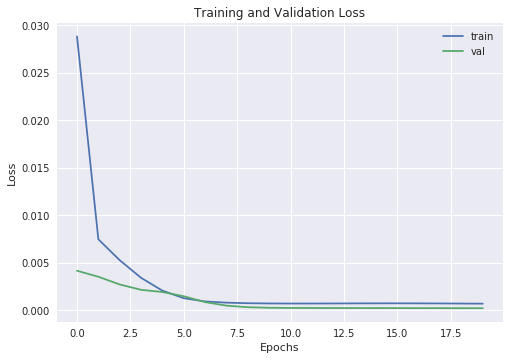

Test RMSE: 1.166
Test RMSE/std_dev: 0.157
Test MAE: 0.695


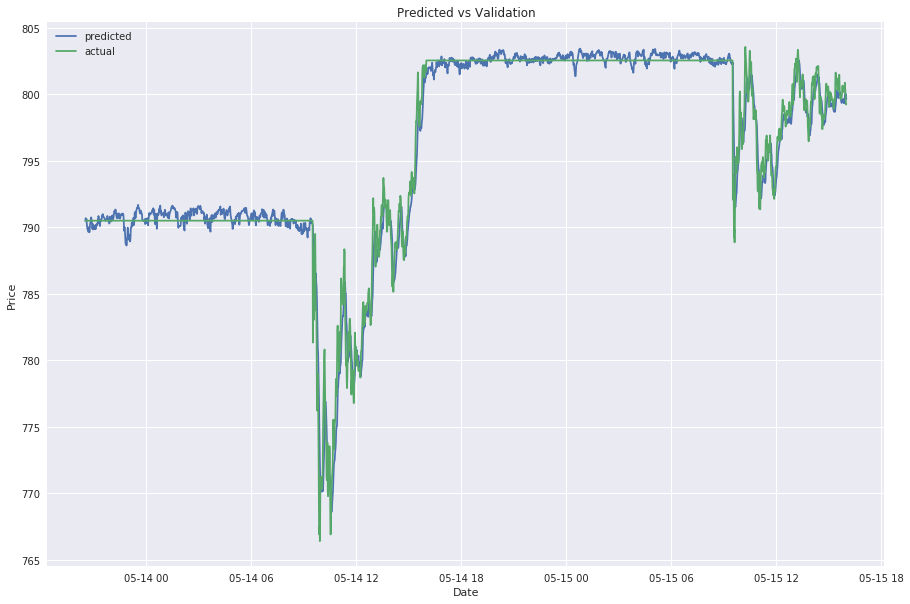

(3540, 270, 4) (3540,) (3265, 270, 4) (3265,)
Test RMSE: 1.016
Test RMSE/std_dev: 0.149
Test MAE: 0.686


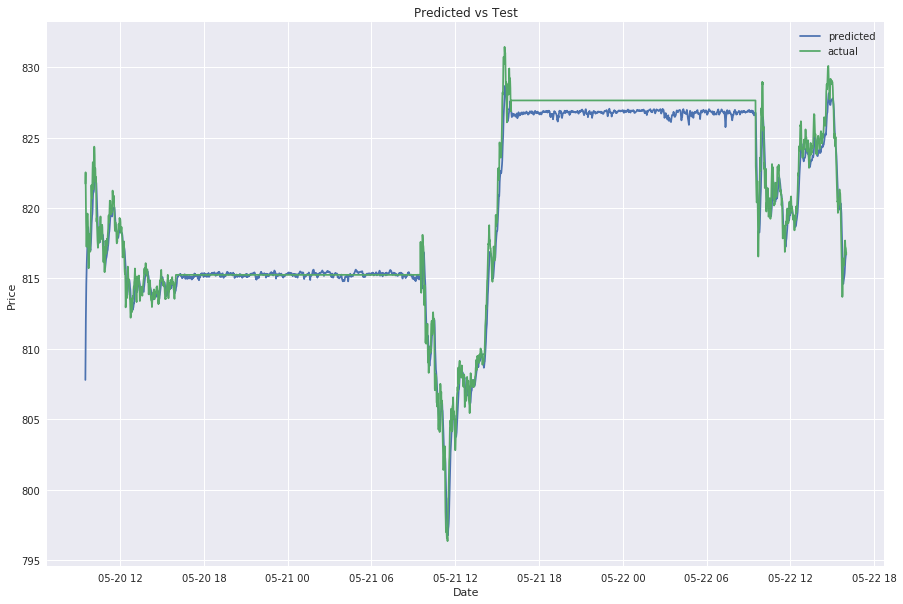

In [136]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(25, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-2610:], y_pred, label='predicted')
    plt.plot(train_data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 25 - short - relu
- 25-dimensionial single layer
- activation = relu
- epochs = 20
- batch size = 63
- 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 6s - loss: 0.2124 - val_loss: 0.0039
Epoch 2/20
56/56 - 5s - loss: 0.0046 - val_loss: 0.0025
Epoch 3/20
56/56 - 5s - loss: 0.0046 - val_loss: 0.0033
Epoch 4/20
56/56 - 5s - loss: 0.0029 - val_loss: 0.0024
Epoch 5/20
56/56 - 5s - loss: 0.0031 - val_loss: 0.0023
Epoch 6/20
56/56 - 5s - loss: 0.0026 - val_loss: 0.0011
Epoch 7/20
56/56 - 6s - loss: 0.0021 - val_loss: 6.9277e-04
Epoch 8/20
56/56 - 6s - loss: 0.0016 - val_loss: 8.6970e-04
Epoch 9/20
56/56 - 6s - loss: 0.0010 - val_loss: 6.8982e-04
Epoch 10/20
56/56 - 5s - loss: 8.6174e-04 - val_loss: 3.6742e-04
Epoch 11/20
56/56 - 5s - loss: 8.1178e-04 - val_loss: 4.0696e-04
Epoch 12/20
56/56 - 5s - loss: 6.9636e-04 - val_loss: 3.5537e-04
Epoch 13/20
56/56 - 5s - loss: 6.6759e-04 - val_loss: 3.5714e-04
Epoch 14/20
56/56 - 5s - loss: 6.5343e-04 - val_loss: 3.3734e-04
Epoch 15/20
56/56 - 5s - loss: 6.2934e-04 - val_loss: 3.0200e-04
Epoch 16/20
56/56 - 6s

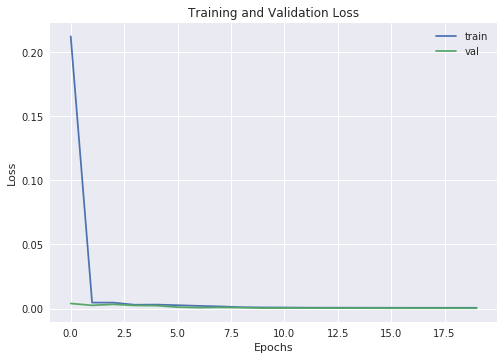

Test RMSE: 1.235
Test RMSE/std_dev: 0.167
Test MAE: 0.818


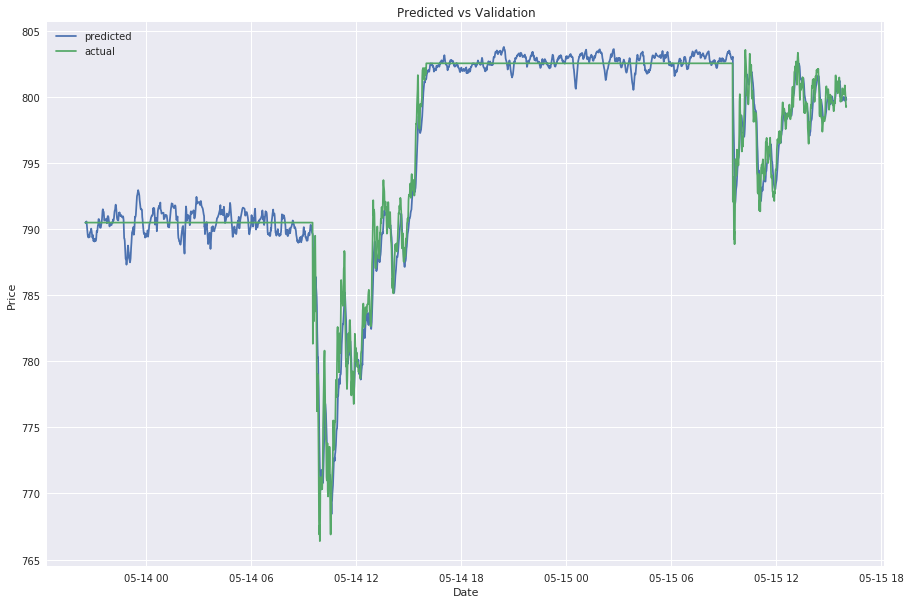

(3540, 270, 4) (3540,) (3265, 270, 4) (3265,)
Test RMSE: 1.041
Test RMSE/std_dev: 0.153
Test MAE: 0.612


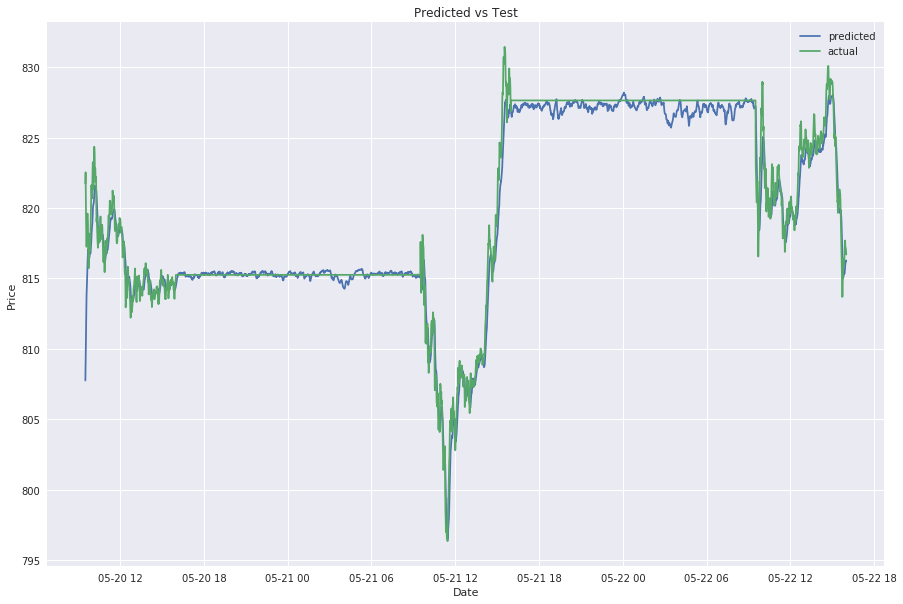

In [137]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(25, activation = 'relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-2610:], y_pred, label='predicted')
    plt.plot(train_data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 25 - long - tanh
- 25-dimensional single layer
- activation=tanh
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 7s - loss: 0.0364 - val_loss: 0.0222
Epoch 2/20
78/78 - 6s - loss: 0.0119 - val_loss: 0.0190
Epoch 3/20
78/78 - 6s - loss: 0.0094 - val_loss: 0.0148
Epoch 4/20
78/78 - 6s - loss: 0.0071 - val_loss: 0.0113
Epoch 5/20
78/78 - 6s - loss: 0.0053 - val_loss: 0.0080
Epoch 6/20
78/78 - 5s - loss: 0.0037 - val_loss: 0.0048
Epoch 7/20
78/78 - 6s - loss: 0.0024 - val_loss: 0.0021
Epoch 8/20
78/78 - 6s - loss: 0.0016 - val_loss: 6.6714e-04
Epoch 9/20
78/78 - 6s - loss: 0.0011 - val_loss: 2.5636e-04
Epoch 10/20
78/78 - 6s - loss: 9.2860e-04 - val_loss: 2.8714e-04
Epoch 11/20
78/78 - 6s - loss: 8.9391e-04 - val_loss: 3.1483e-04
Epoch 12/20
78/78 - 6s - loss: 8.7084e-04 - val_loss: 3.0467e-04
Epoch 13/20
78/78 - 6s - loss: 8.3564e-04 - val_loss: 2.9628e-04
Epoch 14/20
78/78 - 6s - loss: 7.9851e-04 - val_loss: 2.9136e-04
Epoch 15/20
78/78 - 6s - loss: 7.6623e-04 - val_loss: 2.8875e-04
Epoch 16/20
78/78 - 6s - l

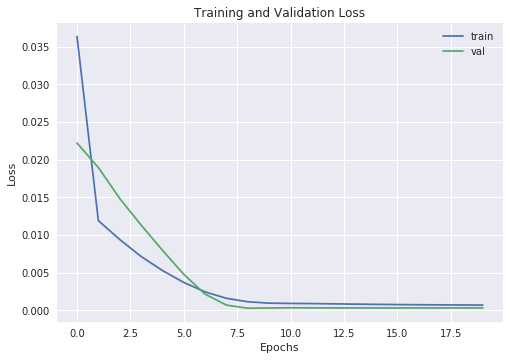

Test RMSE: 1.305
Test RMSE/std_dev: 0.510
Test MAE: 1.046


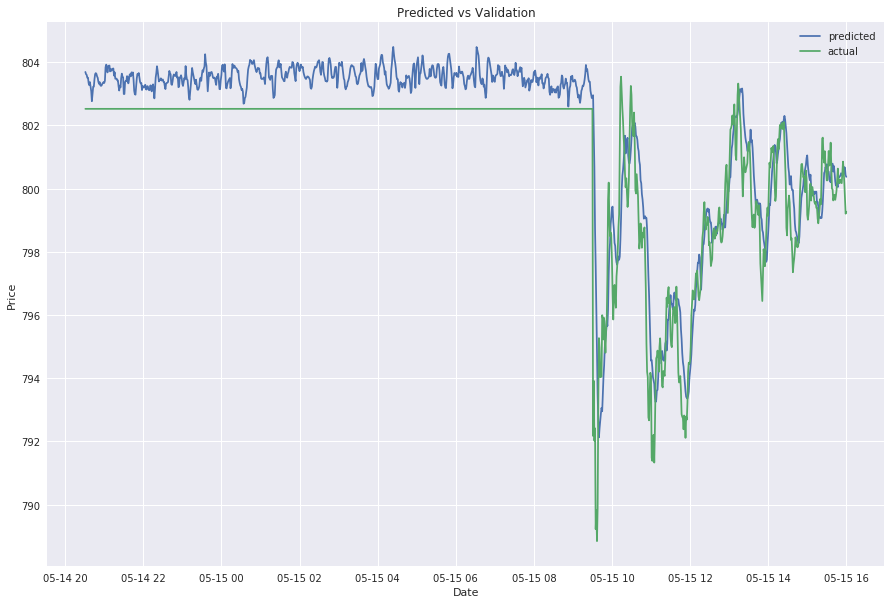

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 0.946
Test RMSE/std_dev: 0.139
Test MAE: 0.591


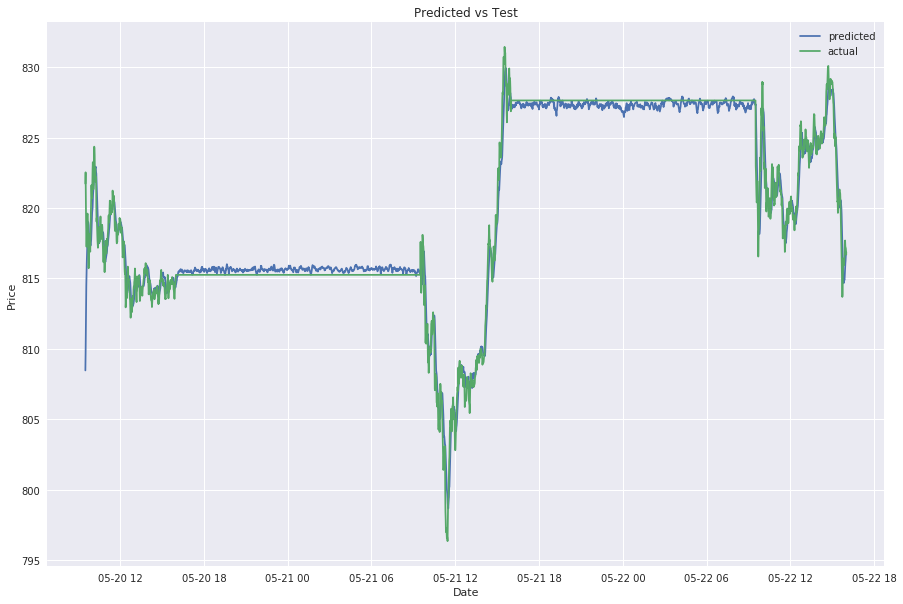

In [135]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(25, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 25 - long - relu
- 25-dimensional single layer
- activation = relu
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 7s - loss: 0.0811 - val_loss: 0.0150
Epoch 2/20
78/78 - 6s - loss: 0.0331 - val_loss: 0.0296
Epoch 3/20
78/78 - 7s - loss: 0.0363 - val_loss: 0.0142
Epoch 4/20
78/78 - 7s - loss: 0.0270 - val_loss: 0.0145
Epoch 5/20
78/78 - 6s - loss: 0.0221 - val_loss: 0.0220
Epoch 6/20
78/78 - 6s - loss: 0.0154 - val_loss: 0.0133
Epoch 7/20
78/78 - 7s - loss: 0.0125 - val_loss: 0.0133
Epoch 8/20
78/78 - 6s - loss: 0.0087 - val_loss: 0.0114
Epoch 9/20
78/78 - 7s - loss: 0.0064 - val_loss: 0.0089
Epoch 10/20
78/78 - 7s - loss: 0.0045 - val_loss: 0.0056
Epoch 11/20
78/78 - 7s - loss: 0.0030 - val_loss: 0.0030
Epoch 12/20
78/78 - 6s - loss: 0.0021 - val_loss: 0.0014
Epoch 13/20
78/78 - 7s - loss: 0.0015 - val_loss: 6.2573e-04
Epoch 14/20
78/78 - 8s - loss: 0.0012 - val_loss: 3.3882e-04
Epoch 15/20
78/78 - 7s - loss: 9.8579e-04 - val_loss: 2.4397e-04
Epoch 16/20
78/78 - 6s - loss: 8.7771e-04 - val_loss: 2.3610e-04
E

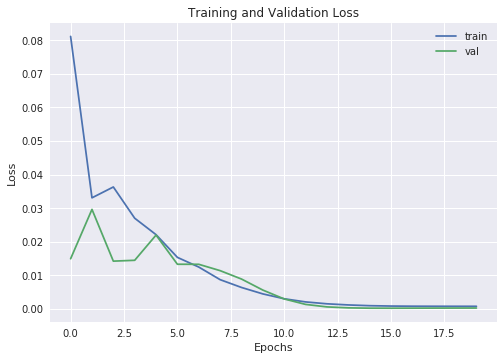

Test RMSE: 1.290
Test RMSE/std_dev: 0.504
Test MAE: 0.972


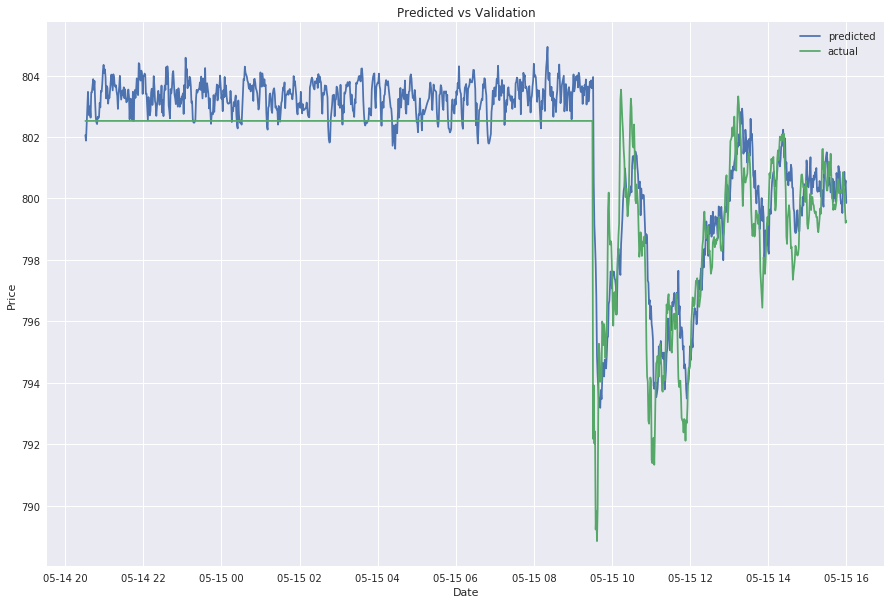

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 1.349
Test RMSE/std_dev: 0.198
Test MAE: 0.838


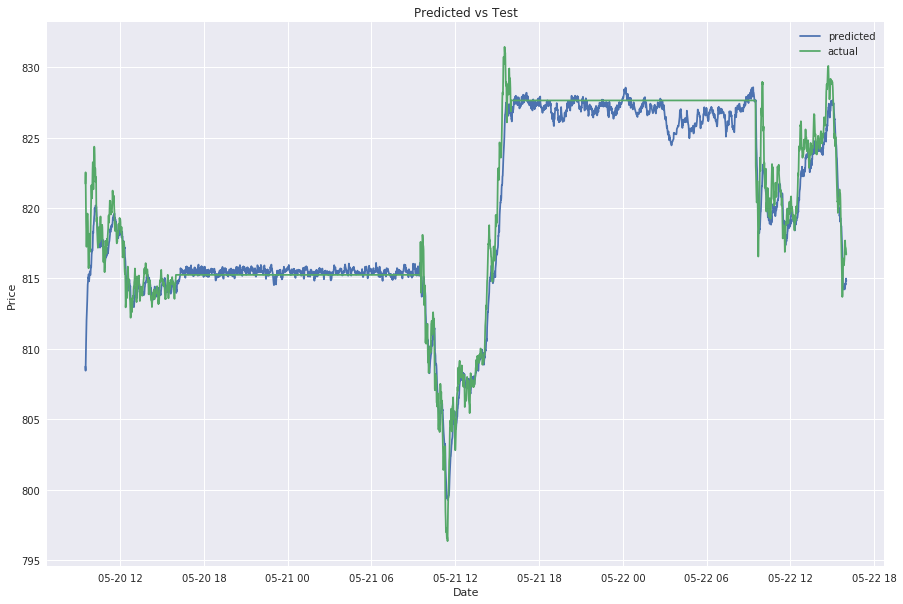

In [138]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(25, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 50 - short - tanh
- 50-dimensionial single layer
- activation = tanh
- epochs = 20
- batch size = 63
- 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 6s - loss: 0.0445 - val_loss: 0.0045
Epoch 2/20
56/56 - 5s - loss: 0.0046 - val_loss: 0.0028
Epoch 3/20
56/56 - 5s - loss: 0.0025 - val_loss: 0.0035
Epoch 4/20
56/56 - 5s - loss: 0.0016 - val_loss: 0.0034
Epoch 5/20
56/56 - 5s - loss: 0.0013 - val_loss: 0.0027
Epoch 6/20
56/56 - 5s - loss: 0.0012 - val_loss: 0.0020
Epoch 7/20
56/56 - 5s - loss: 0.0011 - val_loss: 0.0014
Epoch 8/20
56/56 - 5s - loss: 0.0010 - val_loss: 9.7292e-04
Epoch 9/20
56/56 - 5s - loss: 0.0010 - val_loss: 6.9960e-04
Epoch 10/20
56/56 - 5s - loss: 0.0010 - val_loss: 5.3175e-04
Epoch 11/20
56/56 - 5s - loss: 0.0010 - val_loss: 4.2850e-04
Epoch 12/20
56/56 - 5s - loss: 0.0010 - val_loss: 3.6552e-04
Epoch 13/20
56/56 - 5s - loss: 0.0010 - val_loss: 3.2921e-04
Epoch 14/20
56/56 - 5s - loss: 9.7496e-04 - val_loss: 3.0930e-04
Epoch 15/20
56/56 - 5s - loss: 9.3333e-04 - val_loss: 2.9787e-04
Epoch 16/20
56/56 - 5s - loss: 8.9739e-04 

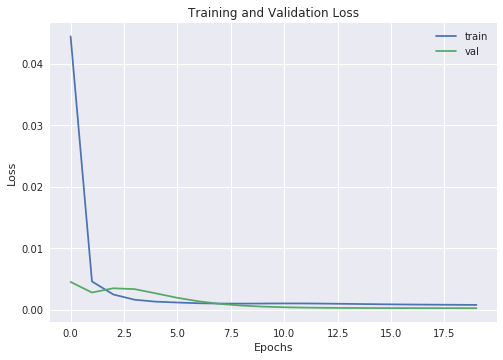

Test RMSE: 1.249
Test RMSE/std_dev: 0.169
Test MAE: 0.776


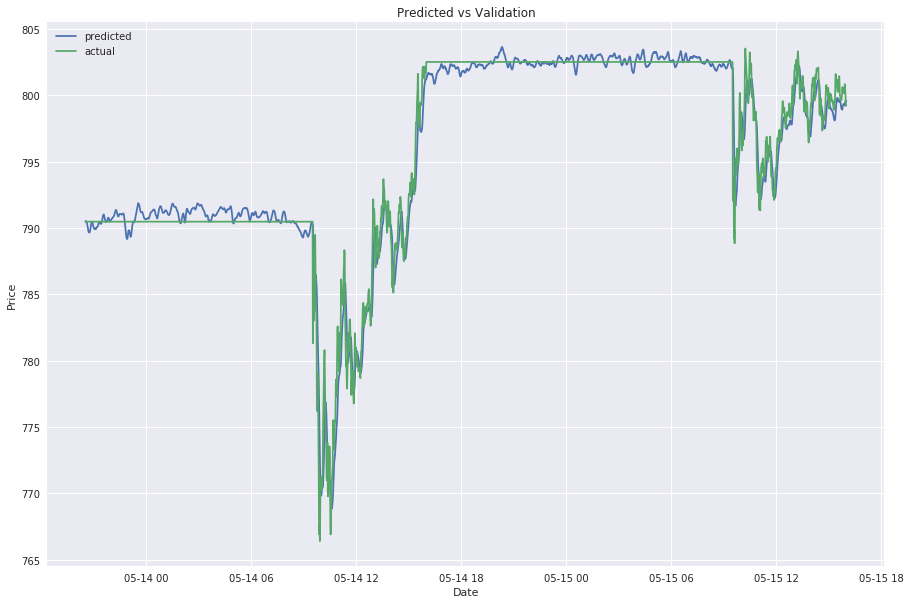

(3540, 270, 4) (3540,) (3265, 270, 4) (3265,)
Test RMSE: 1.168
Test RMSE/std_dev: 0.172
Test MAE: 0.857


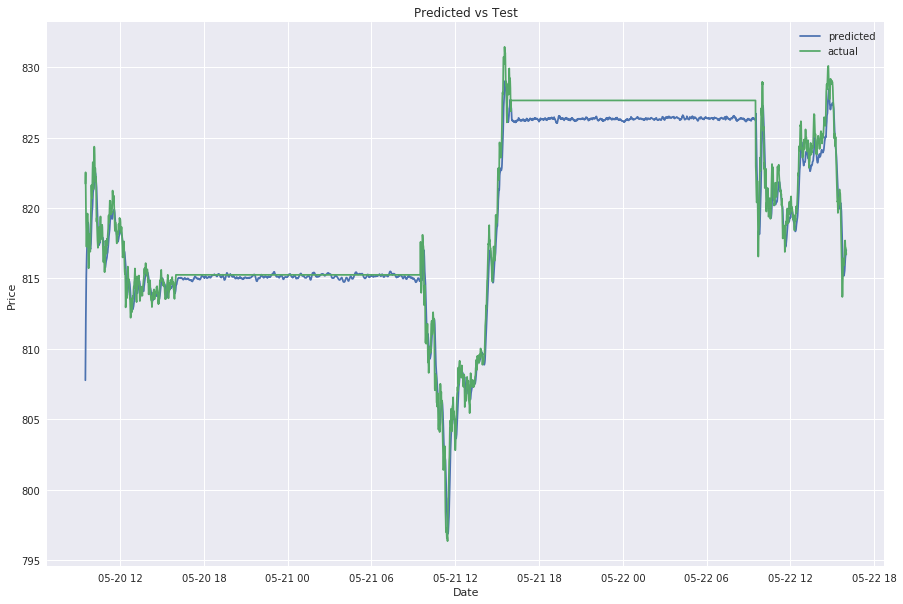

In [127]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-2610:], y_pred, label='predicted')
    plt.plot(train_data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 50 - short - relu
- 50-dimensionial single layer
- activation = relu
- epochs = 20
- batch size = 63
- 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 6s - loss: 0.0422 - val_loss: 0.0054
Epoch 2/20
56/56 - 5s - loss: 0.0102 - val_loss: 0.0042
Epoch 3/20
56/56 - 5s - loss: 0.0078 - val_loss: 0.0041
Epoch 4/20
56/56 - 5s - loss: 0.0063 - val_loss: 0.0037
Epoch 5/20
56/56 - 5s - loss: 0.0054 - val_loss: 0.0036
Epoch 6/20
56/56 - 5s - loss: 0.0048 - val_loss: 0.0036
Epoch 7/20
56/56 - 5s - loss: 0.0044 - val_loss: 0.0035
Epoch 8/20
56/56 - 5s - loss: 0.0039 - val_loss: 0.0030
Epoch 9/20
56/56 - 5s - loss: 0.0032 - val_loss: 0.0035
Epoch 10/20
56/56 - 5s - loss: 0.0022 - val_loss: 0.0024
Epoch 11/20
56/56 - 5s - loss: 0.0020 - val_loss: 0.0023
Epoch 12/20
56/56 - 5s - loss: 0.0015 - val_loss: 0.0013
Epoch 13/20
56/56 - 6s - loss: 9.1942e-04 - val_loss: 5.4722e-04
Epoch 14/20
56/56 - 5s - loss: 7.1025e-04 - val_loss: 2.7448e-04
Epoch 15/20
56/56 - 6s - loss: 5.9823e-04 - val_loss: 2.5596e-04
Epoch 16/20
56/56 - 6s - loss: 5.4153e-04 - val_loss: 3.23

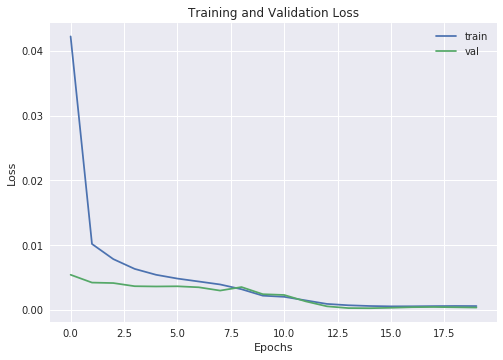

Test RMSE: 1.437
Test RMSE/std_dev: 0.194
Test MAE: 1.075


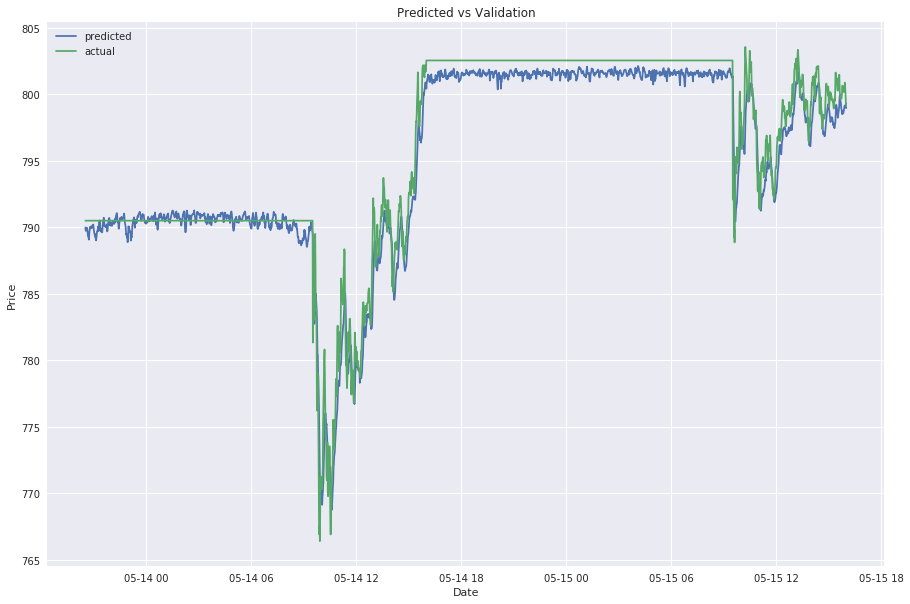

(3540, 270, 4) (3540,) (3265, 270, 4) (3265,)
Test RMSE: 1.403
Test RMSE/std_dev: 0.206
Test MAE: 1.152


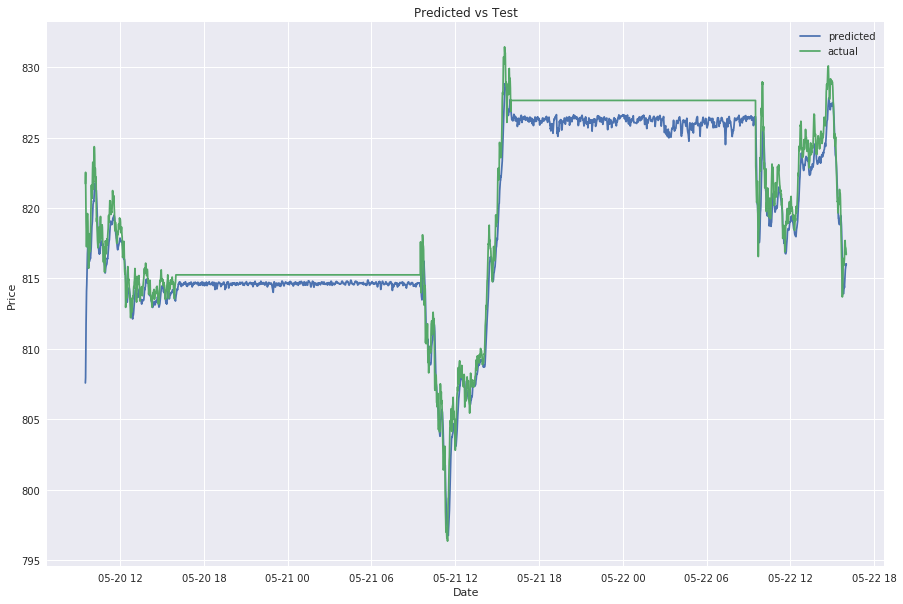

In [143]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-2610:], y_pred, label='predicted')
    plt.plot(train_data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 50 - long - tanh
- 64-dimensional single layer
- activation=tanh
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 8s - loss: 0.0201 - val_loss: 0.0044
Epoch 2/20
78/78 - 7s - loss: 0.0037 - val_loss: 0.0015
Epoch 3/20
78/78 - 7s - loss: 0.0023 - val_loss: 2.7462e-04
Epoch 4/20
78/78 - 7s - loss: 0.0014 - val_loss: 7.3350e-04
Epoch 5/20
78/78 - 7s - loss: 0.0013 - val_loss: 8.4083e-04
Epoch 6/20
78/78 - 8s - loss: 0.0012 - val_loss: 8.1549e-04
Epoch 7/20
78/78 - 8s - loss: 0.0011 - val_loss: 8.0699e-04
Epoch 8/20
78/78 - 8s - loss: 0.0011 - val_loss: 8.0786e-04
Epoch 9/20
78/78 - 8s - loss: 0.0011 - val_loss: 8.1039e-04
Epoch 10/20
78/78 - 8s - loss: 0.0011 - val_loss: 8.0704e-04
Epoch 11/20
78/78 - 8s - loss: 0.0010 - val_loss: 7.9641e-04
Epoch 12/20
78/78 - 9s - loss: 9.7761e-04 - val_loss: 7.8117e-04
Epoch 13/20
78/78 - 8s - loss: 9.3972e-04 - val_loss: 7.6492e-04
Epoch 14/20
78/78 - 8s - loss: 9.0535e-04 - val_loss: 7.5027e-04
Epoch 15/20
78/78 - 8s - loss: 8.7558e-04 - val_loss: 7.3842e-04
Epoch 16/20
78

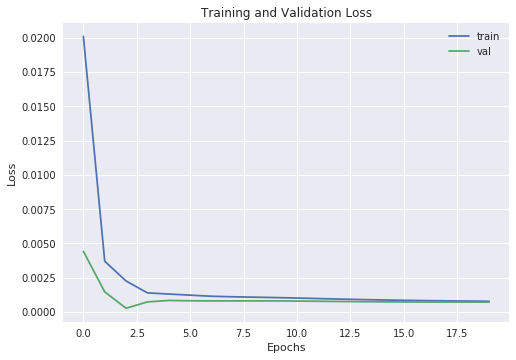

Test RMSE: 2.039
Test RMSE/std_dev: 0.797
Test MAE: 1.826


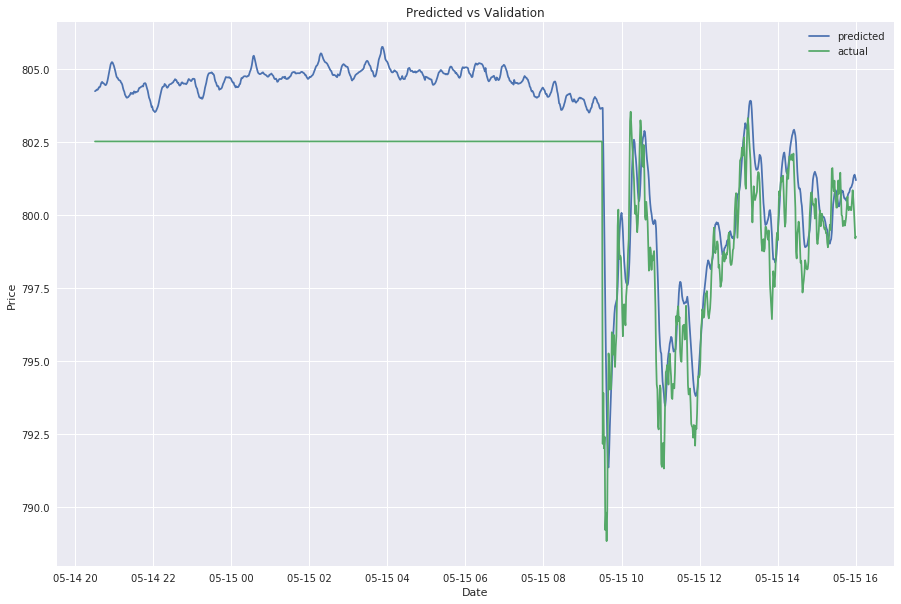

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 0.951
Test RMSE/std_dev: 0.140
Test MAE: 0.660


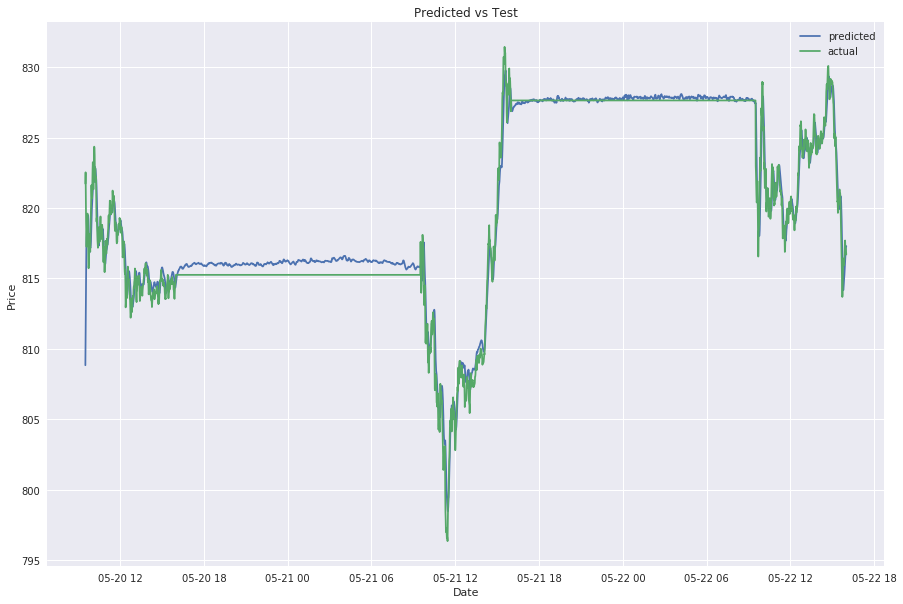

In [140]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 50 - long - relu
- 64-dimensional single layer
- activation = relu
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 8s - loss: 0.0506 - val_loss: 0.0253
Epoch 2/20
78/78 - 7s - loss: 0.0102 - val_loss: 0.0050
Epoch 3/20
78/78 - 8s - loss: 0.0056 - val_loss: 0.0056
Epoch 4/20
78/78 - 8s - loss: 0.0043 - val_loss: 0.0028
Epoch 5/20
78/78 - 7s - loss: 0.0032 - val_loss: 0.0017
Epoch 6/20
78/78 - 8s - loss: 0.0027 - val_loss: 0.0013
Epoch 7/20
78/78 - 7s - loss: 0.0022 - val_loss: 6.7113e-04
Epoch 8/20
78/78 - 7s - loss: 0.0020 - val_loss: 6.7370e-04
Epoch 9/20
78/78 - 7s - loss: 0.0019 - val_loss: 4.8822e-04
Epoch 10/20
78/78 - 7s - loss: 0.0018 - val_loss: 4.6679e-04
Epoch 11/20
78/78 - 7s - loss: 0.0017 - val_loss: 3.9756e-04
Epoch 12/20
78/78 - 7s - loss: 0.0016 - val_loss: 3.3220e-04
Epoch 13/20
78/78 - 7s - loss: 0.0015 - val_loss: 2.7761e-04
Epoch 14/20
78/78 - 7s - loss: 0.0014 - val_loss: 2.3508e-04
Epoch 15/20
78/78 - 7s - loss: 0.0013 - val_loss: 2.0262e-04
Epoch 16/20
78/78 - 7s - loss: 0.0012 - val_lo

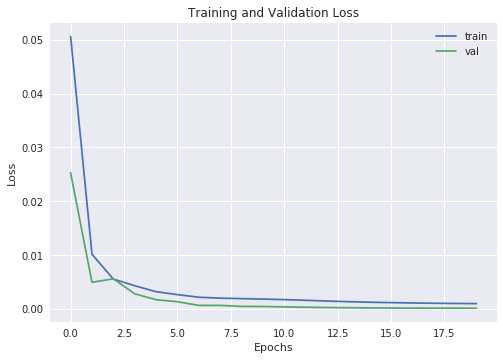

Test RMSE: 0.926
Test RMSE/std_dev: 0.362
Test MAE: 0.534


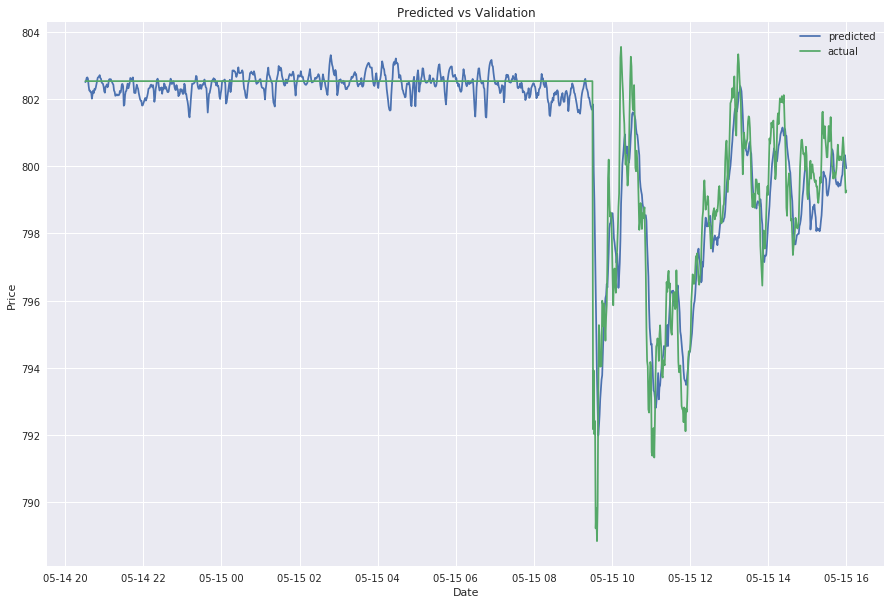

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 1.297
Test RMSE/std_dev: 0.191
Test MAE: 1.024


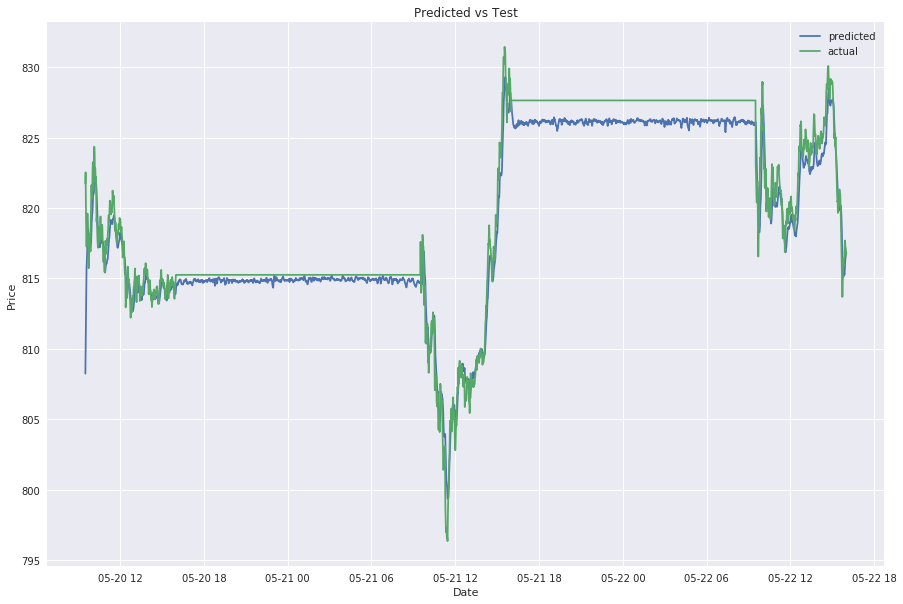

In [142]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

 # LSTM - 64 - short - tanh
 - 64-dimensional single layer
 - activation=tanh
 - epochs = 20
 - batch size = 64
 - 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 7s - loss: 0.0227 - val_loss: 0.0069
Epoch 2/20
56/56 - 6s - loss: 0.0043 - val_loss: 0.0105
Epoch 3/20
56/56 - 6s - loss: 0.0032 - val_loss: 0.0093
Epoch 4/20
56/56 - 6s - loss: 0.0025 - val_loss: 0.0071
Epoch 5/20
56/56 - 6s - loss: 0.0020 - val_loss: 0.0049
Epoch 6/20
56/56 - 6s - loss: 0.0016 - val_loss: 0.0031
Epoch 7/20
56/56 - 6s - loss: 0.0014 - val_loss: 0.0019
Epoch 8/20
56/56 - 6s - loss: 0.0014 - val_loss: 0.0013
Epoch 9/20
56/56 - 6s - loss: 0.0015 - val_loss: 8.6409e-04
Epoch 10/20
56/56 - 6s - loss: 0.0015 - val_loss: 5.6132e-04
Epoch 11/20
56/56 - 6s - loss: 0.0013 - val_loss: 3.7648e-04
Epoch 12/20
56/56 - 6s - loss: 0.0011 - val_loss: 3.1043e-04
Epoch 13/20
56/56 - 7s - loss: 9.2345e-04 - val_loss: 2.8773e-04
Epoch 14/20
56/56 - 6s - loss: 8.2867e-04 - val_loss: 2.7525e-04
Epoch 15/20
56/56 - 6s - loss: 7.9089e-04 - val_loss: 2.7444e-04
Epoch 16/20
56/56 - 6s - loss: 7.9351e-04 

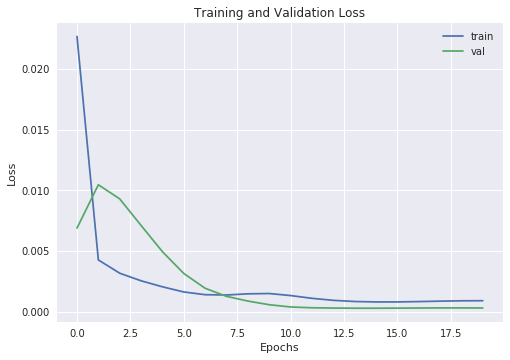

Test RMSE: 1.299
Test RMSE/std_dev: 0.175
Test MAE: 0.808


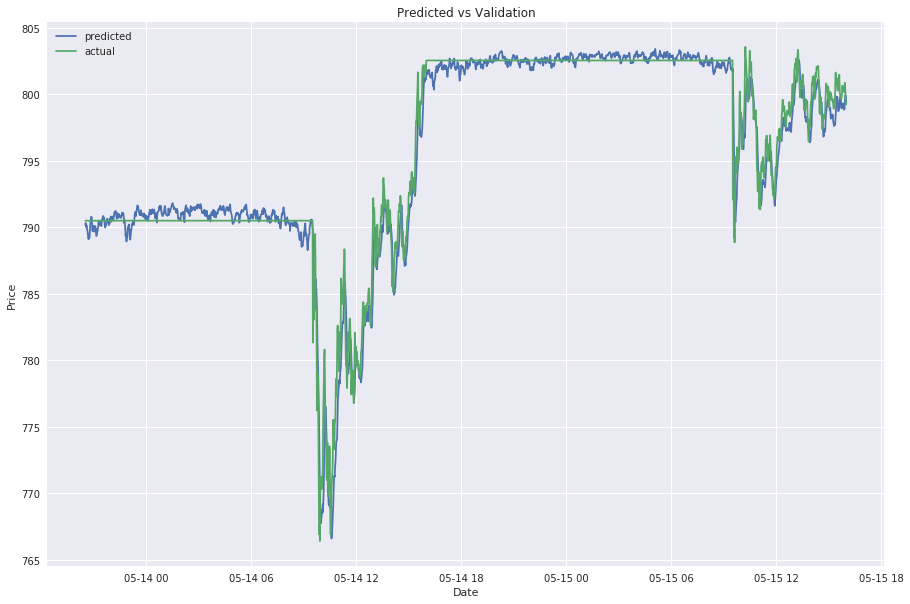

(3540, 270, 4) (3540,) (3265, 270, 4) (3265,)
Test RMSE: 1.176
Test RMSE/std_dev: 0.173
Test MAE: 0.854


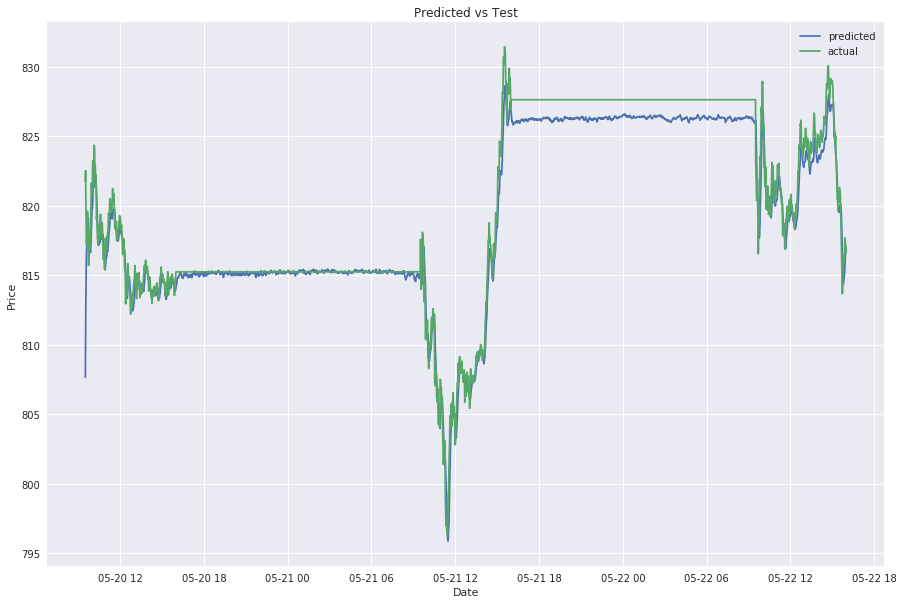

In [144]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-2610:], y_pred, label='predicted')
    plt.plot(train_data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 64 - short - relu
- 64-dimensional single layer
- activation=relu
- epochs = 20
- batch size = 64
- 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 6s - loss: 0.0604 - val_loss: 0.0140
Epoch 2/20
56/56 - 6s - loss: 0.0197 - val_loss: 0.0051
Epoch 3/20
56/56 - 6s - loss: 0.0095 - val_loss: 0.0037
Epoch 4/20
56/56 - 7s - loss: 0.0067 - val_loss: 0.0023
Epoch 5/20
56/56 - 6s - loss: 0.0040 - val_loss: 0.0033
Epoch 6/20
56/56 - 6s - loss: 0.0017 - val_loss: 6.7445e-04
Epoch 7/20
56/56 - 6s - loss: 9.9968e-04 - val_loss: 6.0113e-04
Epoch 8/20
56/56 - 6s - loss: 9.5857e-04 - val_loss: 6.8047e-04
Epoch 9/20
56/56 - 6s - loss: 0.0011 - val_loss: 5.2868e-04
Epoch 10/20
56/56 - 7s - loss: 0.0011 - val_loss: 4.8916e-04
Epoch 11/20
56/56 - 6s - loss: 0.0010 - val_loss: 4.8359e-04
Epoch 12/20
56/56 - 6s - loss: 0.0011 - val_loss: 5.0065e-04
Epoch 13/20
56/56 - 6s - loss: 0.0011 - val_loss: 5.2563e-04
Epoch 14/20
56/56 - 6s - loss: 9.9800e-04 - val_loss: 5.2281e-04
Epoch 15/20
56/56 - 7s - loss: 9.1411e-04 - val_loss: 5.0113e-04
Epoch 16/20
56/56 - 6s - l

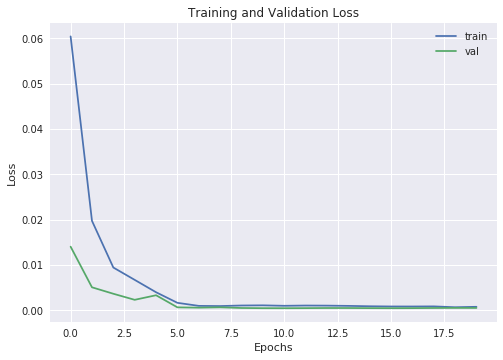

Test RMSE: 1.767
Test RMSE/std_dev: 0.239
Test MAE: 1.439


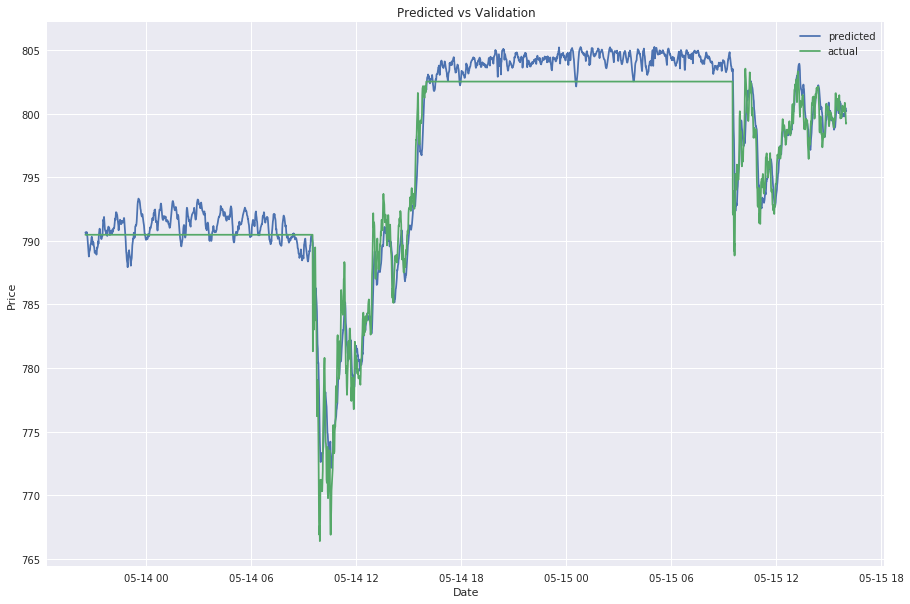

(3540, 270, 4) (3540,) (3265, 270, 4) (3265,)
Test RMSE: 1.249
Test RMSE/std_dev: 0.183
Test MAE: 1.010


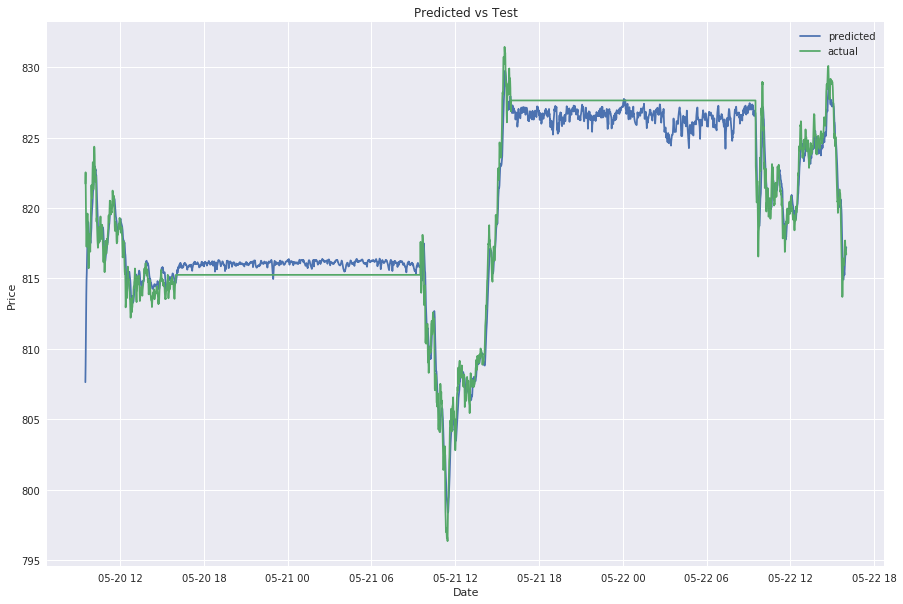

In [145]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-2610:], y_pred, label='predicted')
    plt.plot(train_data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 64 - long - tanh
- 64-dimensional single layer
- activation=tanh
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 9s - loss: 0.0295 - val_loss: 0.0059
Epoch 2/20
78/78 - 9s - loss: 0.0043 - val_loss: 0.0024
Epoch 3/20
78/78 - 9s - loss: 0.0031 - val_loss: 7.0097e-04
Epoch 4/20
78/78 - 8s - loss: 0.0021 - val_loss: 1.9659e-04
Epoch 5/20
78/78 - 8s - loss: 0.0016 - val_loss: 5.7952e-04
Epoch 6/20
78/78 - 9s - loss: 0.0014 - val_loss: 7.4702e-04
Epoch 7/20
78/78 - 9s - loss: 0.0012 - val_loss: 7.3215e-04
Epoch 8/20
78/78 - 9s - loss: 0.0010 - val_loss: 7.0308e-04
Epoch 9/20
78/78 - 9s - loss: 9.5982e-04 - val_loss: 6.8170e-04
Epoch 10/20
78/78 - 9s - loss: 9.1289e-04 - val_loss: 6.7426e-04
Epoch 11/20
78/78 - 9s - loss: 8.9201e-04 - val_loss: 6.7832e-04
Epoch 12/20
78/78 - 9s - loss: 8.8468e-04 - val_loss: 6.8835e-04
Epoch 13/20
78/78 - 10s - loss: 8.8150e-04 - val_loss: 6.9927e-04
Epoch 14/20
78/78 - 9s - loss: 8.7638e-04 - val_loss: 7.0786e-04
Epoch 15/20
78/78 - 9s - loss: 8.6668e-04 - val_loss: 7.1295e-04
E

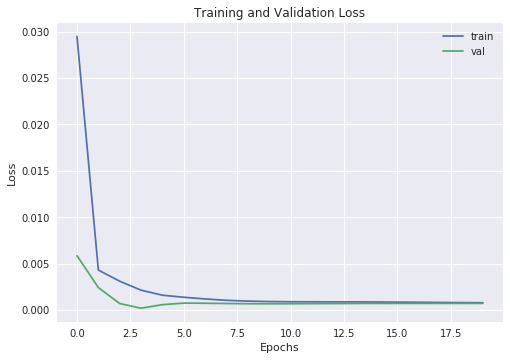

Test RMSE: 2.031
Test RMSE/std_dev: 0.794
Test MAE: 1.817


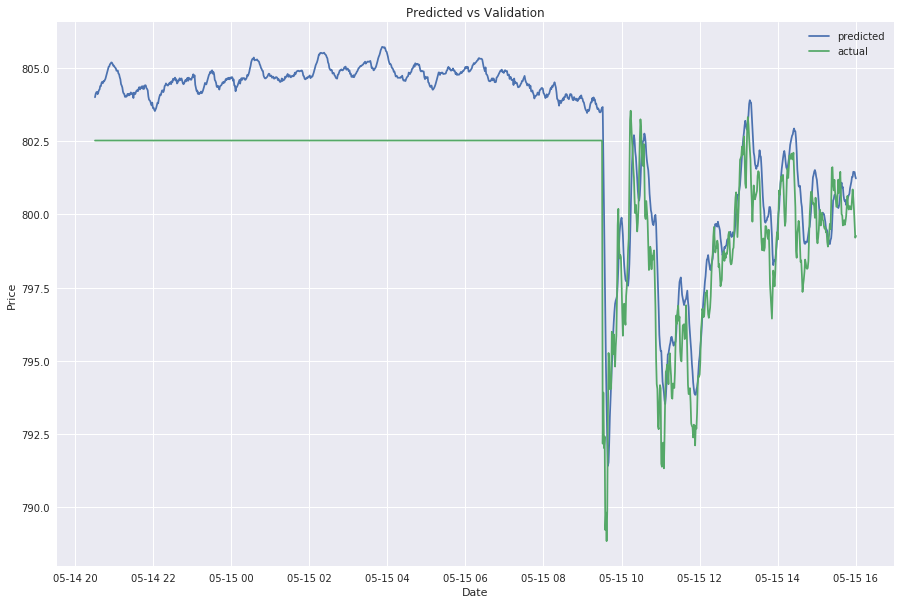

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 0.934
Test RMSE/std_dev: 0.137
Test MAE: 0.646


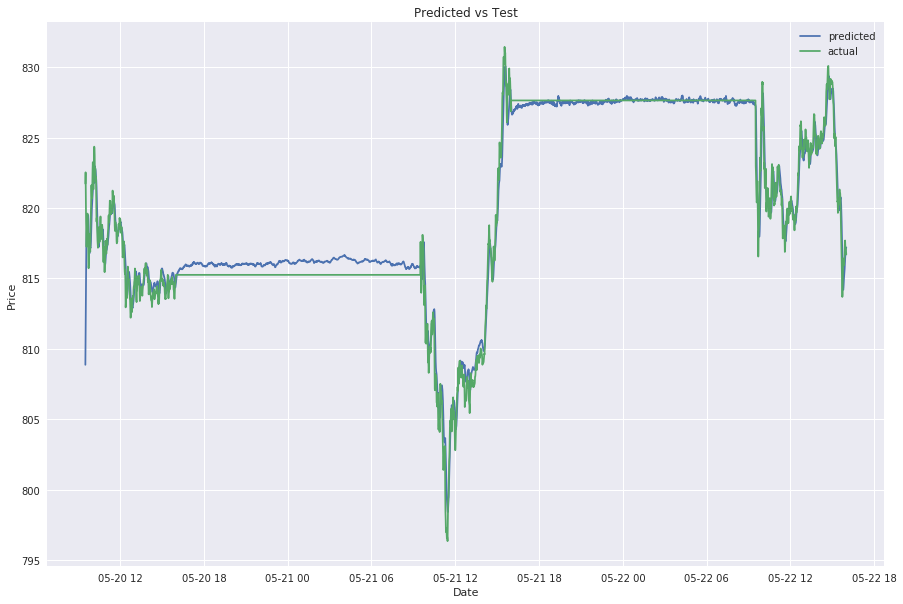

In [146]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 64 - long - relu
- 64-dimensional single layer
- activation=tanh
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 8s - loss: 0.0248 - val_loss: 0.0129
Epoch 2/20
78/78 - 8s - loss: 0.0065 - val_loss: 0.0078
Epoch 3/20
78/78 - 8s - loss: 0.0045 - val_loss: 0.0059
Epoch 4/20
78/78 - 8s - loss: 0.0033 - val_loss: 0.0034
Epoch 5/20
78/78 - 8s - loss: 0.0025 - val_loss: 0.0016
Epoch 6/20
78/78 - 8s - loss: 0.0022 - val_loss: 0.0018
Epoch 7/20
78/78 - 8s - loss: 0.0022 - val_loss: 9.7505e-04
Epoch 8/20
78/78 - 8s - loss: 0.0021 - val_loss: 0.0019
Epoch 9/20
78/78 - 9s - loss: 0.0018 - val_loss: 3.1649e-04
Epoch 10/20
78/78 - 8s - loss: 0.0015 - val_loss: 0.0012
Epoch 11/20
78/78 - 8s - loss: 9.5095e-04 - val_loss: 5.1673e-04
Epoch 12/20
78/78 - 8s - loss: 0.0013 - val_loss: 2.5174e-04
Epoch 13/20
78/78 - 8s - loss: 0.0015 - val_loss: 7.6379e-04
Epoch 14/20
78/78 - 9s - loss: 0.0016 - val_loss: 2.9926e-04
Epoch 15/20
78/78 - 9s - loss: 0.0014 - val_loss: 4.9602e-04
Epoch 16/20
78/78 - 8s - loss: 0.0012 - val_loss: 

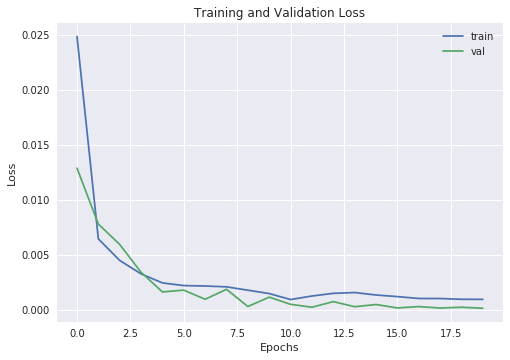

Test RMSE: 0.970
Test RMSE/std_dev: 0.379
Test MAE: 0.597


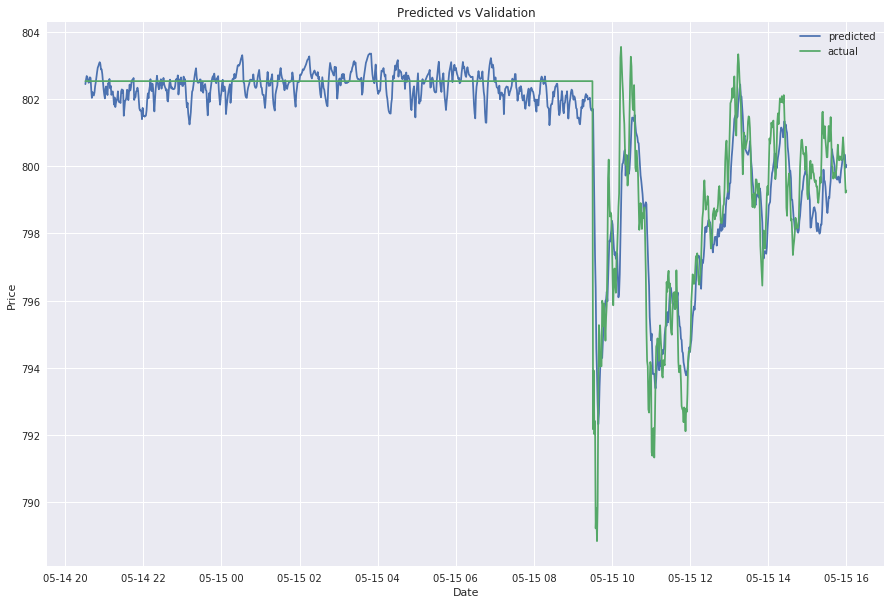

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 1.162
Test RMSE/std_dev: 0.171
Test MAE: 0.902


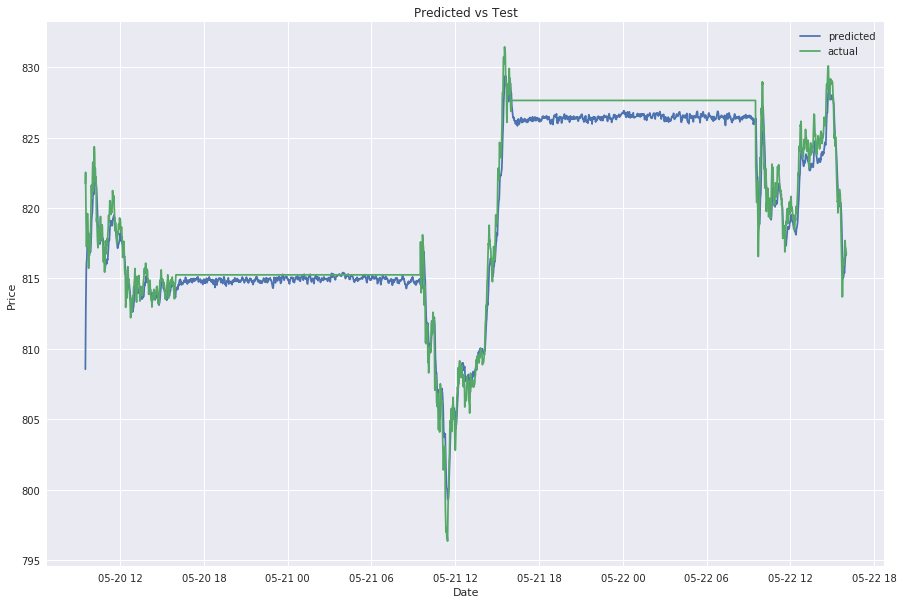

In [148]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

 # LSTM - 100 - short - tanh
 - 64-dimensional single layer
 - activation=tanh
 - epochs = 20
 - batch size = 100
 - 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 10s - loss: 0.0191 - val_loss: 0.0039
Epoch 2/20
56/56 - 9s - loss: 0.0069 - val_loss: 0.0037
Epoch 3/20
56/56 - 10s - loss: 0.0031 - val_loss: 0.0037
Epoch 4/20
56/56 - 10s - loss: 0.0013 - val_loss: 0.0023
Epoch 5/20
56/56 - 10s - loss: 0.0013 - val_loss: 0.0015
Epoch 6/20
56/56 - 10s - loss: 0.0013 - val_loss: 0.0010
Epoch 7/20
56/56 - 10s - loss: 0.0014 - val_loss: 8.3063e-04
Epoch 8/20
56/56 - 9s - loss: 0.0015 - val_loss: 6.3149e-04
Epoch 9/20
56/56 - 9s - loss: 0.0014 - val_loss: 4.6897e-04
Epoch 10/20
56/56 - 9s - loss: 0.0013 - val_loss: 3.7022e-04
Epoch 11/20
56/56 - 9s - loss: 0.0011 - val_loss: 3.2255e-04
Epoch 12/20
56/56 - 9s - loss: 9.9317e-04 - val_loss: 3.0049e-04
Epoch 13/20
56/56 - 9s - loss: 9.3256e-04 - val_loss: 2.9196e-04
Epoch 14/20
56/56 - 9s - loss: 9.0739e-04 - val_loss: 2.9178e-04
Epoch 15/20
56/56 - 9s - loss: 9.0606e-04 - val_loss: 2.9587e-04
Epoch 16/20
56/56 - 10s 

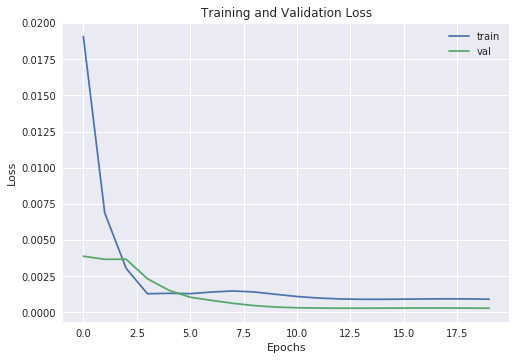

Test RMSE: 1.293
Test RMSE/std_dev: 0.175
Test MAE: 0.815


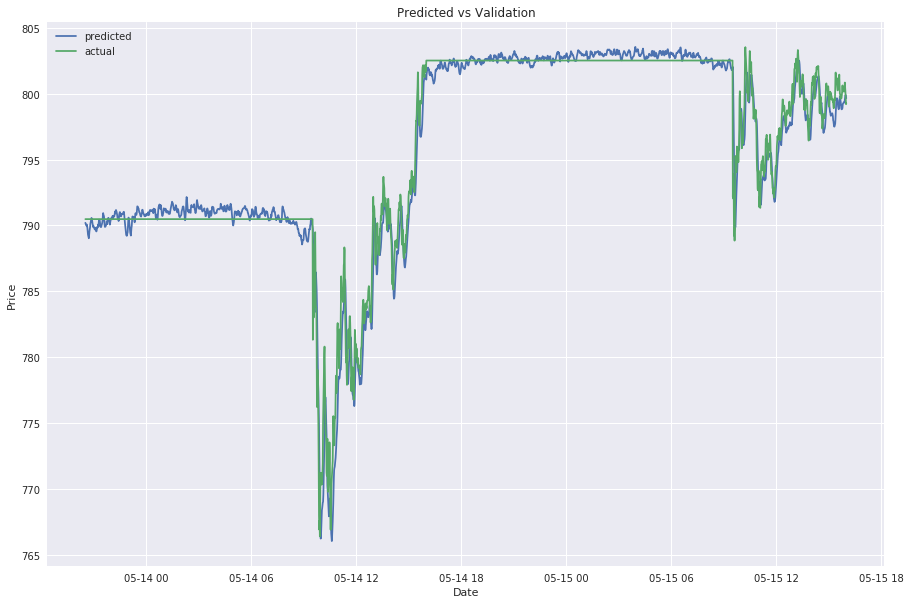

In [150]:
# load dataset
values = data.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
window = 270
features = 4
# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]
# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)
# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))
# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(data.index[-2610:], y_pred, label='predicted')
    plt.plot(data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

 # LSTM - 100 - short - relu
 - 64-dimensional single layer
 - activation = relu
 - epochs = 20
 - batch size = 100
 - 2 nights and 2 days of predictions

(3540, 1080) 3540 (3540,)
(3540, 270, 4) (3540,) (2610, 270, 4) (2610,)
Epoch 1/20
56/56 - 9s - loss: 0.0472 - val_loss: 0.0069
Epoch 2/20
56/56 - 9s - loss: 0.0098 - val_loss: 0.0098
Epoch 3/20
56/56 - 9s - loss: 0.0124 - val_loss: 0.0052
Epoch 4/20
56/56 - 9s - loss: 0.0078 - val_loss: 0.0034
Epoch 5/20
56/56 - 9s - loss: 0.0057 - val_loss: 0.0032
Epoch 6/20
56/56 - 8s - loss: 0.0041 - val_loss: 0.0036
Epoch 7/20
56/56 - 9s - loss: 0.0031 - val_loss: 0.0033
Epoch 8/20
56/56 - 8s - loss: 0.0021 - val_loss: 0.0025
Epoch 9/20
56/56 - 9s - loss: 0.0014 - val_loss: 0.0011
Epoch 10/20
56/56 - 9s - loss: 0.0011 - val_loss: 9.8024e-04
Epoch 11/20
56/56 - 8s - loss: 9.7268e-04 - val_loss: 3.8904e-04
Epoch 12/20
56/56 - 8s - loss: 8.5319e-04 - val_loss: 3.3285e-04
Epoch 13/20
56/56 - 9s - loss: 8.0875e-04 - val_loss: 3.3227e-04
Epoch 14/20
56/56 - 8s - loss: 7.8906e-04 - val_loss: 3.4762e-04
Epoch 15/20
56/56 - 8s - loss: 9.1612e-04 - val_loss: 3.7519e-04
Epoch 16/20
56/56 - 8s - loss: 0.0010 

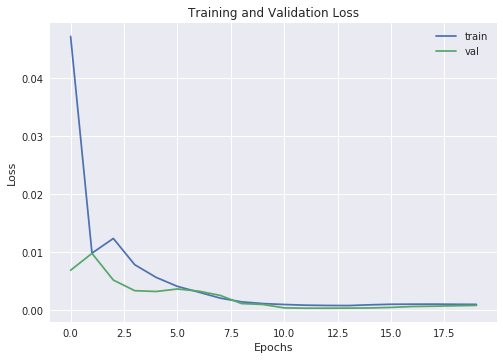

Test RMSE: 2.170
Test RMSE/std_dev: 0.293
Test MAE: 1.839


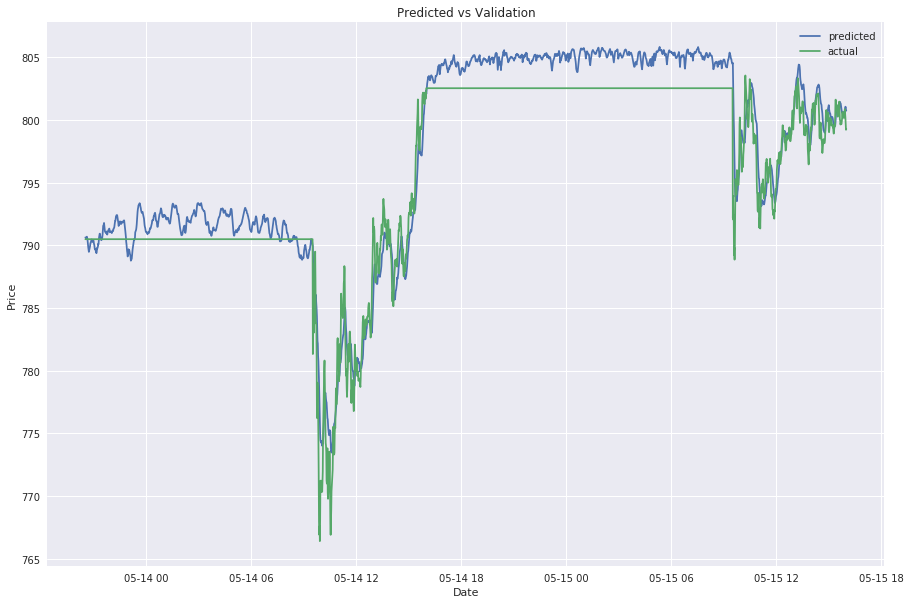

(3540, 270, 4) (3540,) (3265, 270, 4) (3265,)
Test RMSE: 1.209
Test RMSE/std_dev: 0.178
Test MAE: 0.941


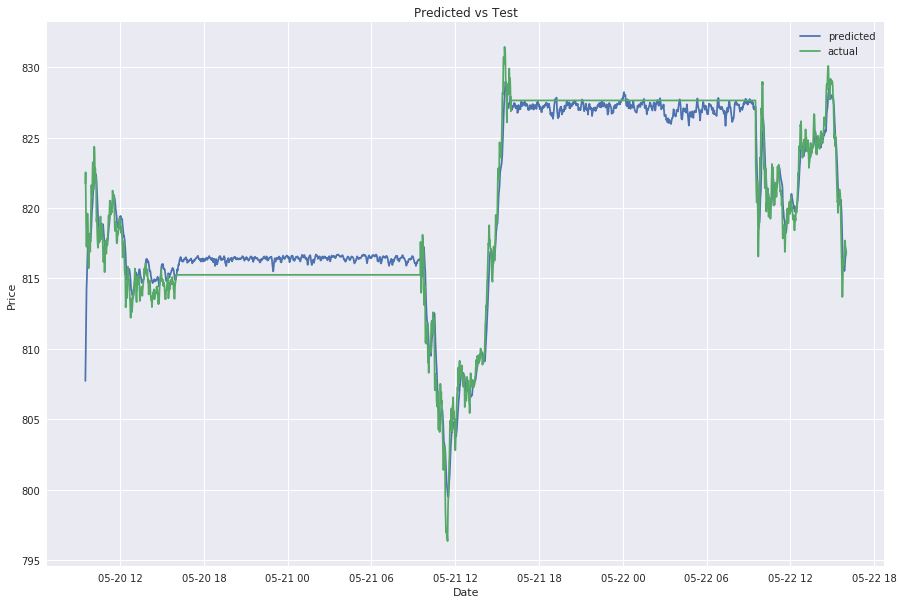

In [149]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(100, activation = 'relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-2610:], y_pred, label='predicted')
    plt.plot(train_data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 100 - long - tanh
- 100-dimensional single layer
- activation = tanh
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 12s - loss: 0.0208 - val_loss: 0.0050
Epoch 2/20
78/78 - 12s - loss: 0.0059 - val_loss: 0.0023
Epoch 3/20
78/78 - 12s - loss: 0.0038 - val_loss: 5.5955e-04
Epoch 4/20
78/78 - 12s - loss: 0.0023 - val_loss: 2.9028e-04
Epoch 5/20
78/78 - 12s - loss: 0.0015 - val_loss: 6.5469e-04
Epoch 6/20
78/78 - 12s - loss: 0.0014 - val_loss: 6.9518e-04
Epoch 7/20
78/78 - 11s - loss: 0.0012 - val_loss: 6.6919e-04
Epoch 8/20
78/78 - 11s - loss: 0.0011 - val_loss: 6.5406e-04
Epoch 9/20
78/78 - 11s - loss: 0.0011 - val_loss: 6.5295e-04
Epoch 10/20
78/78 - 11s - loss: 0.0011 - val_loss: 6.6126e-04
Epoch 11/20
78/78 - 11s - loss: 0.0011 - val_loss: 6.7284e-04
Epoch 12/20
78/78 - 11s - loss: 0.0011 - val_loss: 6.8329e-04
Epoch 13/20
78/78 - 11s - loss: 0.0011 - val_loss: 6.9059e-04
Epoch 14/20
78/78 - 11s - loss: 0.0010 - val_loss: 6.9469e-04
Epoch 15/20
78/78 - 11s - loss: 0.0010 - val_loss: 6.9659e-04
Epoch 16/20
78/

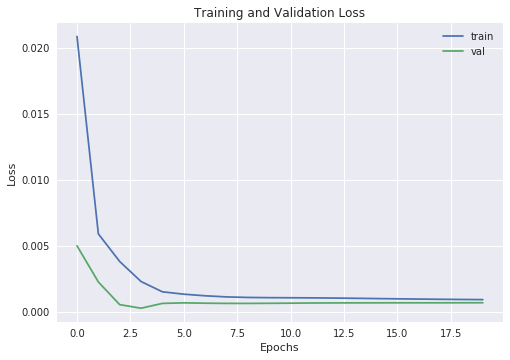

Test RMSE: 2.011
Test RMSE/std_dev: 0.786
Test MAE: 1.803


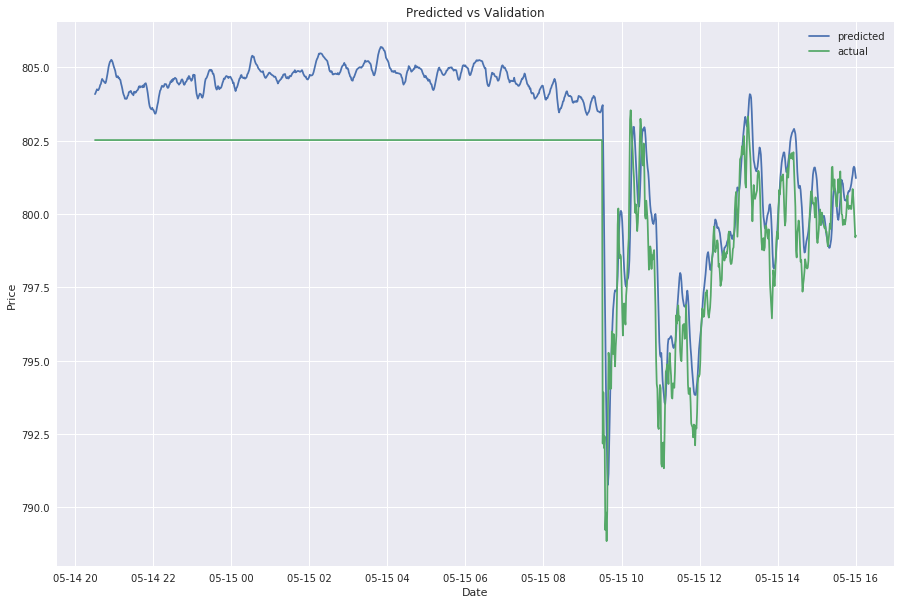

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 0.918
Test RMSE/std_dev: 0.135
Test MAE: 0.650


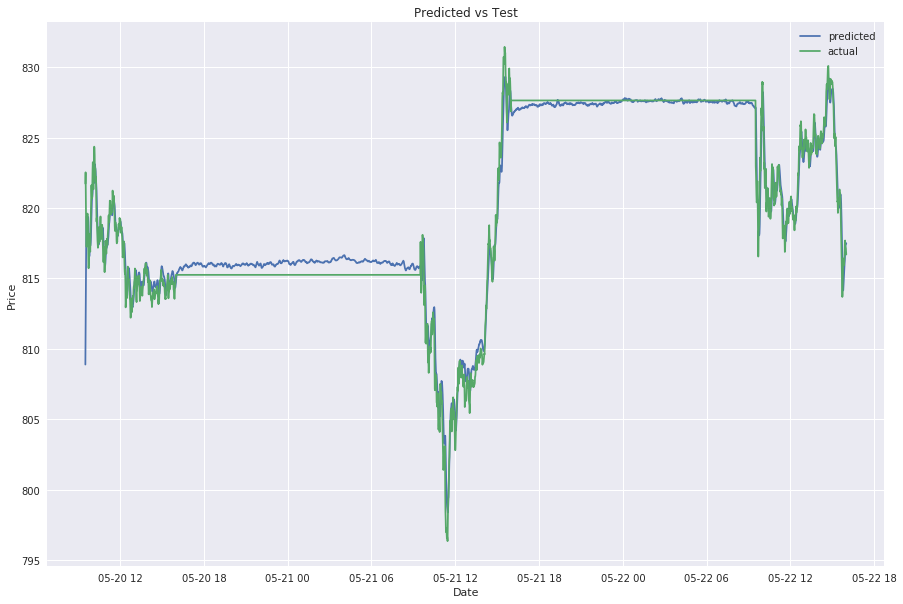

In [151]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM - 100 - long - relu
- 100-dimensional single layer
- activation=tanh
- epochs = 20
- batch size = 64
- 2 nights and 3 days of predictioins

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 11s - loss: 0.0304 - val_loss: 0.0097
Epoch 2/20
78/78 - 13s - loss: 0.0047 - val_loss: 0.0035
Epoch 3/20
78/78 - 12s - loss: 0.0033 - val_loss: 0.0016
Epoch 4/20
78/78 - 12s - loss: 0.0036 - val_loss: 0.0030
Epoch 5/20
78/78 - 12s - loss: 0.0037 - val_loss: 2.8482e-04
Epoch 6/20
78/78 - 12s - loss: 0.0022 - val_loss: 5.0728e-04
Epoch 7/20
78/78 - 12s - loss: 0.0023 - val_loss: 2.9737e-04
Epoch 8/20
78/78 - 12s - loss: 0.0025 - val_loss: 0.0010
Epoch 9/20
78/78 - 12s - loss: 0.0027 - val_loss: 3.3925e-04
Epoch 10/20
78/78 - 12s - loss: 0.0022 - val_loss: 6.6935e-04
Epoch 11/20
78/78 - 12s - loss: 0.0019 - val_loss: 2.2632e-04
Epoch 12/20
78/78 - 12s - loss: 0.0014 - val_loss: 2.4101e-04
Epoch 13/20
78/78 - 11s - loss: 0.0012 - val_loss: 1.6546e-04
Epoch 14/20
78/78 - 11s - loss: 0.0010 - val_loss: 1.6452e-04
Epoch 15/20
78/78 - 11s - loss: 9.9577e-04 - val_loss: 1.6359e-04
Epoch 16/20
78/78 - 11s

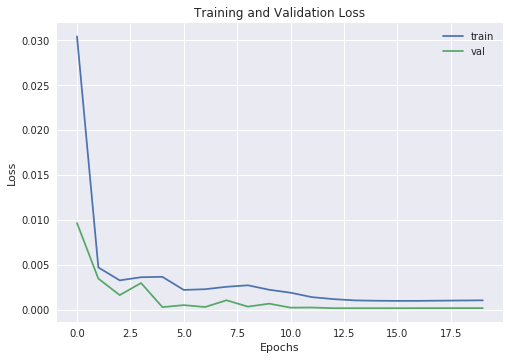

Test RMSE: 0.997
Test RMSE/std_dev: 0.389
Test MAE: 0.676


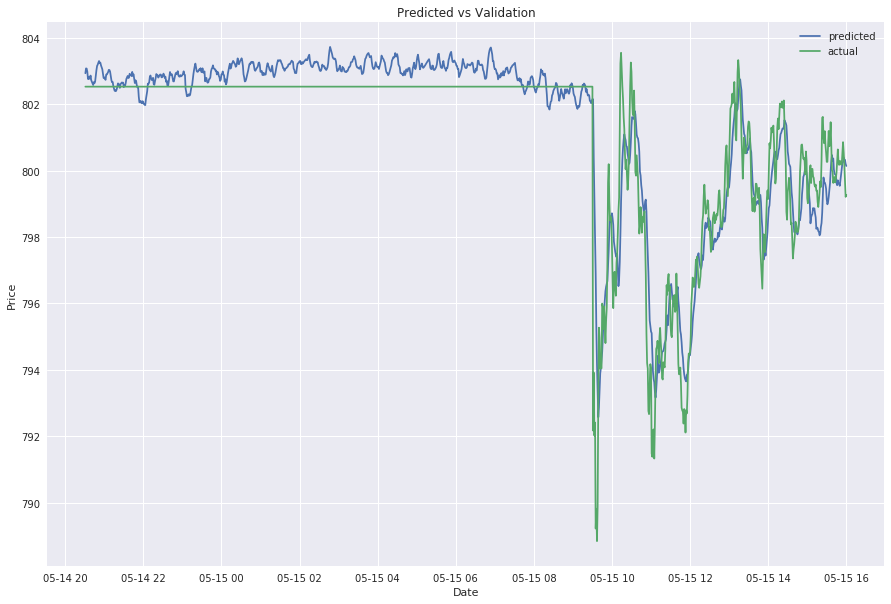

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 1.031
Test RMSE/std_dev: 0.152
Test MAE: 0.720


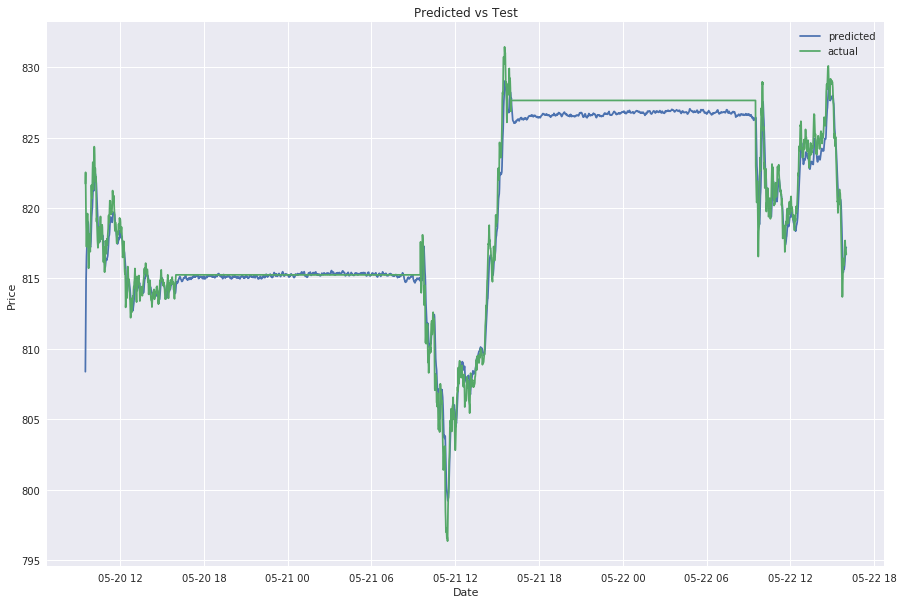

In [152]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(100, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# LSTM 128 - 64 - long - tanh
- 128-dimensional layer, 64-dimensional layer
- activation=tanh
- 2 nights and 2 days of predictions

In [ ]:
# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(128, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

(4980, 1080) 4980 (4980,)
(4980, 270, 4) (4980,) (1170, 270, 4) (1170,)
Epoch 1/20
78/78 - 25s - loss: 0.0196 - val_loss: 9.0116e-04
Epoch 2/20
78/78 - 24s - loss: 0.0131 - val_loss: 0.0045
Epoch 3/20
78/78 - 24s - loss: 0.0106 - val_loss: 0.0027
Epoch 4/20
78/78 - 24s - loss: 0.0080 - val_loss: 0.0015
Epoch 5/20
78/78 - 24s - loss: 0.0060 - val_loss: 3.7930e-04
Epoch 6/20
78/78 - 24s - loss: 0.0046 - val_loss: 3.0876e-04
Epoch 7/20
78/78 - 24s - loss: 0.0035 - val_loss: 8.9881e-04
Epoch 8/20
78/78 - 24s - loss: 0.0028 - val_loss: 0.0012
Epoch 9/20
78/78 - 24s - loss: 0.0023 - val_loss: 0.0012
Epoch 10/20
78/78 - 24s - loss: 0.0019 - val_loss: 0.0012
Epoch 11/20
78/78 - 24s - loss: 0.0017 - val_loss: 0.0012
Epoch 12/20
78/78 - 24s - loss: 0.0017 - val_loss: 0.0012
Epoch 13/20
78/78 - 24s - loss: 0.0016 - val_loss: 0.0012
Epoch 14/20
78/78 - 24s - loss: 0.0017 - val_loss: 0.0013
Epoch 15/20
78/78 - 24s - loss: 0.0018 - val_loss: 0.0013
Epoch 16/20
78/78 - 24s - loss: 0.0019 - val_loss: 

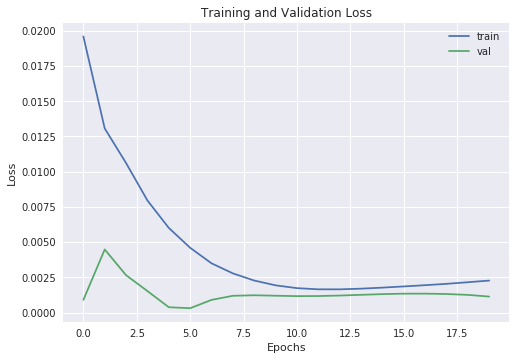

Test RMSE: 2.556
Test RMSE/std_dev: 0.999
Test MAE: 2.302


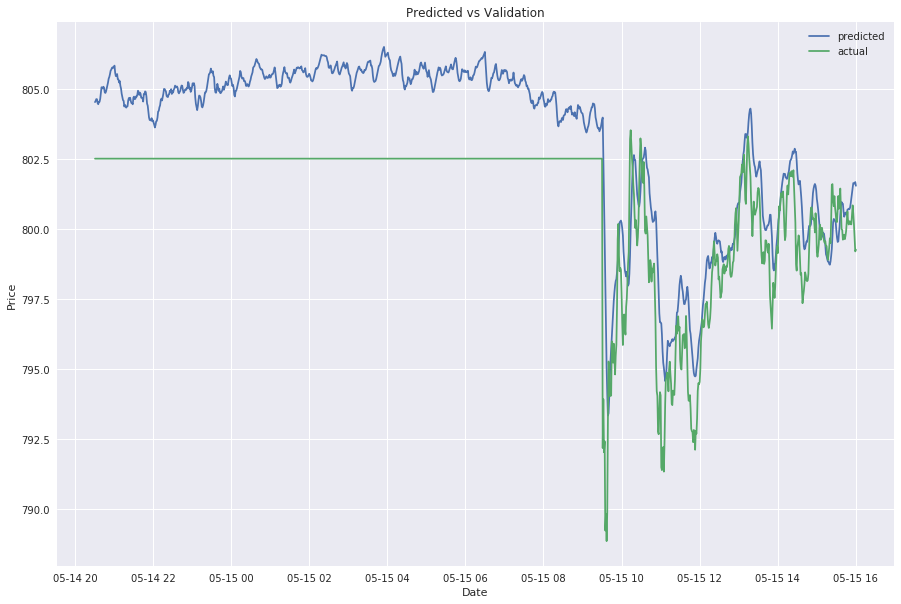

(4980, 270, 4) (4980,) (3265, 270, 4) (3265,)
Test RMSE: 1.368
Test RMSE/std_dev: 0.201
Test MAE: 1.162


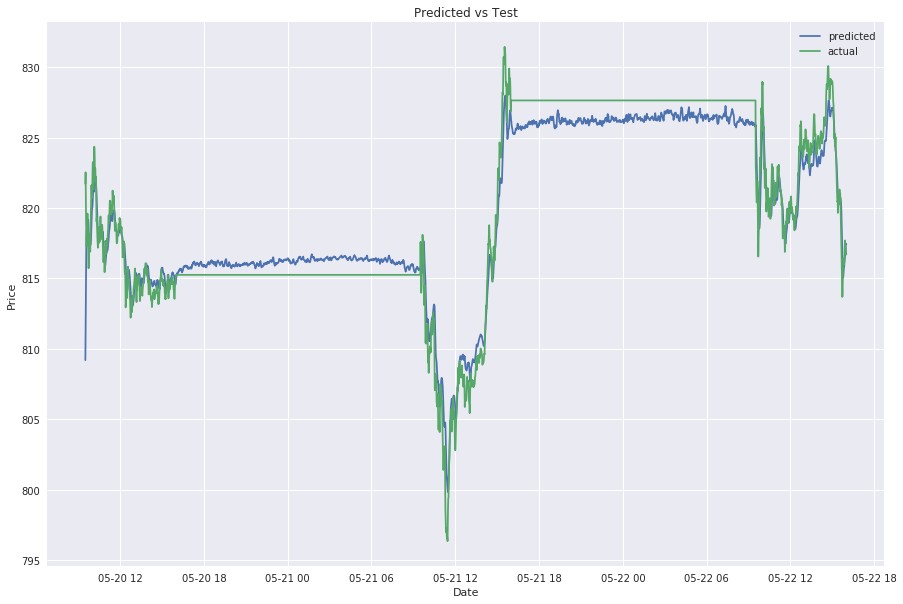

In [153]:
# load dataset
values = train_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag periods
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-14 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]

# split into input and outputs
observations = window * features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window, features))
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(128, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)

# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(train_data.index[-len(y_pred):], y_pred, label='predicted')
    plt.plot(train_data.index[-len(y_actual):], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# load dataset
values = test_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
window = 270
features = 4

# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into input and outputs
values = reframed.values
observations = window * features
test_X, test_y = values[:, :-1], values[:, -1]
# reshape input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], window, features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))

# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Test')
    plt.plot(test_data.index[270:], y_pred, label='predicted')
    plt.plot(test_data.index[270:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()

# Convolutional LSTM
- single 2D convolutional LSTM layer
- filters = 64
- kernel_size = (2,135)
- activation = relu
- epochs = 20
- batch size = 32

(3540, 1080) 3540 (3540,)
(3540, 1, 3, 90, 4) (3540,) (2610, 1, 3, 90, 4) (2610,)
Epoch 1/20
56/56 - 75s - loss: 0.0670 - val_loss: 0.0253
Epoch 2/20
56/56 - 68s - loss: 0.0568 - val_loss: 0.0128
Epoch 3/20
56/56 - 69s - loss: 0.0214 - val_loss: 0.0092
Epoch 4/20
56/56 - 67s - loss: 0.0235 - val_loss: 0.0078
Epoch 5/20
56/56 - 67s - loss: 0.0356 - val_loss: 0.0252
Epoch 6/20
56/56 - 67s - loss: 0.0302 - val_loss: 0.0306
Epoch 7/20
56/56 - 66s - loss: 0.0246 - val_loss: 0.0223
Epoch 8/20
56/56 - 67s - loss: 0.0278 - val_loss: 0.0190
Epoch 9/20
56/56 - 67s - loss: 0.0280 - val_loss: 0.0271
Epoch 10/20
56/56 - 67s - loss: 0.0230 - val_loss: 0.0194
Epoch 11/20
56/56 - 67s - loss: 0.0212 - val_loss: 0.0078
Epoch 12/20
56/56 - 67s - loss: 0.0233 - val_loss: 0.0173
Epoch 13/20
56/56 - 67s - loss: 0.0212 - val_loss: 0.0201
Epoch 14/20
56/56 - 68s - loss: 0.0191 - val_loss: 0.0120
Epoch 15/20
56/56 - 67s - loss: 0.0199 - val_loss: 0.0122
Epoch 16/20
56/56 - 67s - loss: 0.0206 - val_loss: 0.0182

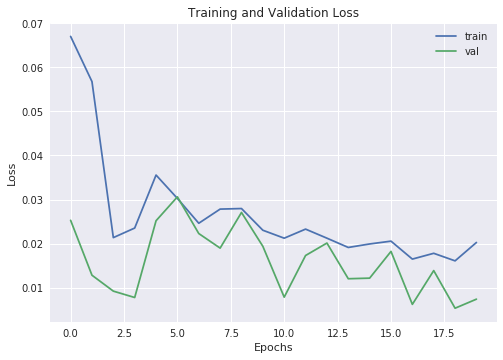

Test RMSE: 6.481
Test RMSE/std_dev: 0.875
Test MAE: 5.326


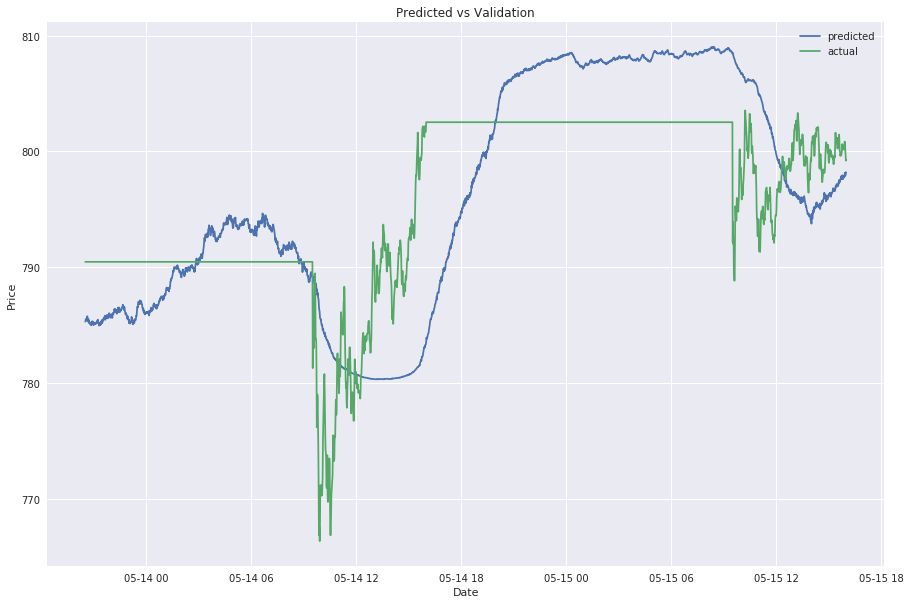

In [113]:
## load dataset
values = data.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
window = 270
features = 4
# frame as supervised learning
reframed = tools.series_to_supervised(scaled, window, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-3,-2,-1]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train_mins = len(data.loc[:'2020-05-13 16:00:00'])
train = values[:train_mins, :]
test = values[train_mins:, :]
# split into input and outputs
observations = n_hours * n_features
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1 ,3, 90, 4))
test_X = test_X.reshape((test_X.shape[0], 1, 3, 90, 4))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.ConvLSTM2D(filters=128, kernel_size=(3,90), input_shape=(train_X.shape[1], 3, 90, 4)))
model.add(tensorflow.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, workers=4)
# plot history
with plt.style.context('seaborn'):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

# make a prediction
y_pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], observations))
y_pred = y_pred.reshape(y_pred.shape[0],1)
# invert scaling for forecast
y_pred = np.concatenate((y_pred, test_X[:, -3:]), axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
y_actual = np.concatenate((test_y, test_X[:, -3:]), axis=1)
y_actual = scaler.inverse_transform(y_actual)
y_actual = y_actual[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(y_actual, y_pred))
print('Test RMSE: %.3f' % rmse)
rmse_std = rmse/y_actual.std()
print('Test RMSE/std_dev: %.3f' % rmse_std)
mae = mean_absolute_error(y_actual, y_pred)
print('Test MAE: %.3f' % mae)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, figsize=(15,10))
    plt.title('Predicted vs Validation')
    plt.plot(data.index[-2610:], y_pred, label='predicted')
    plt.plot(data.index[-2610:], y_actual, label='actual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.show()